Dato il dataset ‵{mcdonalds.csv}‵ che contiene diversi sondaggi relativi ai clienti del famoso fast-food McDonalds, si realizza un progetto di data analysis che prevede la segmentazione dei clienti usando seguenti tecniche:
1. **PCA** (Principal Component Analysis)

2. **Clustering K-Means**

3. **Gerarchico (agglomerativo)**

## Richieste

- [x] Applicare inoltre un metodo di StandardScalar ai dati prima di eseguire il processamento.
- [x] Utilizzare il metodo Elbow e Silhouette Score, per scegliere il numero corretto di cluster. 
- [x] Applicare la clusterizzazione sulle proiezioni sulle due componenti principali. Nello scatter plot che visualizza i cluster, mostrare anche il centro di massa per ognuno dei cluster. 
- [x] Verificare eventuali correlazioni tra i segmenti di clienti, l’età, il gradimento e la frequenza di visita.
- [x] Il progetto deve mostrare gli istogrammi con le frequenze di selezione su ogni features. 
- [x] Oltre al plot con la proiezione dei dati nelle due componenti principali, mostrare Scree Plot e Biplot. 
- [x] Nella standardizzazione di tipo scale ogni variabile di input si modifica sottraendo la media e dividendo per la deviazione standard per spostare la distribuzione in modo che abbia una media pari a zero e una deviazione standard pari a uno.


# **Inizializzazione librerie e lettura file**
Avvio librerie e lettura csv.

***Tabella delle variabili:***
| Variabile                                                | Tipo             | Descrizione                                                                                          |
| -------------------------------------------------------- | ---------------- | ---------------------------------------------------------------------------------------------------- |
| `data`                                                   | Pandas DataFrame | Il DataFrame principale che contiene i dati importati dal file CSV ("mcdonalds.csv").                |
| `file`                                                   | Stringa          | Il nome del file CSV da cui vengono letti i dati.                                                    |
| `rows`                                                   | Intero           | Il numero di righe da visualizzare nell'output iniziale (in questo caso, 15).                        |
| `tableau_colors`, `other_colors`, `all_colors`, `colors` | Liste            | Liste di stringhe che rappresentano i nomi dei colori utilizzati per la visualizzazione dei grafici. |


***I seguenti blocchi di codice:***

1. Importano le librerie necessarie all'analisi dati.
2. Aprono un file CSV (mcdonalds.csv) e visualizza i dati all'interno, printando parte del dataset.

1. ## *Importazione delle librerie:*
    - `pandas` (pd): Per leggere, manipolare e analizzare i dati in formato tabellare.
    - `numpy` (np): Per operazioni numeriche efficienti su array multidimensionali.
    - `seaborn` (sns): Per creare grafici statistici informativi e attraenti.
    - `matplotlib`: Per la creazione di grafici personalizzati.
    - `sklearn`: Per l'apprendimento automatico, inclusi pre-elaborazione dei dati, riduzione della dimensionalità (PCA) e clustering (K-means).
    - `scipy`: Per il clustering gerarchico.

In [57]:
import pandas as pd   # per leggere, manipolare e analizzare dati
import numpy as np   # per le operazioni numeriche
import seaborn as sns   # per la visualizzazione dei dati
import matplotlib.colors as mcolors # per la gestione dei colori
import matplotlib.pyplot as plt   # per la visualizzazione dei dati
from sklearn.preprocessing import StandardScaler   # per la preelaborazione e la normalizzazione dei dati
from sklearn.decomposition import PCA   # per le tecniche di riduzione della dimensionalità come l'Analisi delle Componenti Principali (PCA)
from sklearn.cluster import KMeans   # per l'algoritmo di raggruppamento K-Means
from sklearn.metrics import silhouette_score   # per il calcolo del punteggio della silhouette
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram   # per la clusterizzazione gerarchica e la visualizzazione dei dendrogrammi
# per visualizzare i grafici all'interno del notebook

2. ## *Impostazioni di visualizzazione:*
    - `%matplotlib inline`: Configura il notebook Jupyter per visualizzare i grafici all'interno del notebook stesso.
    - `plt.style.use('ggplot')`: Imposta lo stile di visualizzazione dei grafici simile a quello di ggplot2 (un popolare pacchetto di visualizzazione in R).
    - Definisce liste di colori (`tableau_colors`, `other_colors`, `all_colors`, `colors`) che verranno utilizzate per i grafici.
    - **Lettura dei Dati:**
        - `file = "mcdonalds.csv"`: Assegna il nome del file CSV alla variabile `file`.
        - Prova a leggere i dati dal file CSV in un DataFrame Pandas (`data`).
        - Se il file non può essere letto, viene stampato un messaggio di errore.
    - **Visualizzazione Iniziale:**
        - Stampa informazioni sul numero di righe visualizzate e sulle dimensioni del DataFrame (`data.shape`).
        - `data.head(11)`: Visualizza le prime 11 righe del DataFrame per dare un'idea iniziale dei dati.

In [58]:
%matplotlib inline
plt.style.use('ggplot')   # imposta lo stile di visualizzazione dei grafici
tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
other_colors = list(mcolors.XKCD_COLORS.keys())
all_colors = tableau_colors + other_colors
colors = all_colors[:14]
file = "mcdonalds.csv"   # nome del file da leggere
try:
    data = pd.read_csv(file)   # oggetto DataFrame Pandas contenente i dati
except:
    print("Dataset could not be loaded. Is the dataset missing?")   # eccezione generica nell'eventualità che il file non sia manipolabile

rows = 15   # numero di righe da visualizzare
print("Displaying the firts", rows-1, "rows of", file, "of dimension:", data.shape, "\n" )   # stampa una stringa di presentazione 

data.head(11)

Displaying the firts 14 rows of mcdonalds.csv of dimension: (1453, 15) 



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


## **Recupero informazioni essenziali su dataset e componenti**

***Tabella delle Variabili:***

In questi specifici blocchi di codice, non vengono create nuove variabili.

***I seguenti blocchi di codice:***

1. Visualizzano le informazioni rilevanti sul DataFrame per valutare la qualità dei dati.
2. Ricercano eventuali dati mancanti.

1. ## *Riepilogo informazioni del dataframe*
    - `data.info()` fornisce un riepilogo del DataFrame `data`:
        - Numero di righe e colonne nel DataFrame.
        - Tipi di dati di ciascuna colonna (ad esempio, numeri interi, float, stringhe, ecc.).
        - Quantità di memoria utilizzata dal DataFrame.
        - Il numero di valori non nulli in ciascuna colonna

In [59]:
data.info()   # stampa un riepilogo delle informazioni contenute nel dataframe (numero di righe, colonne, tipo di dati, memoria utilizzata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


> Il dataframe ha dimensioni 15x1453, 15 colonne (features) di dtype object, una numerica ('Age': numpy.int64).

2. ## *Ricerca valori mancanti*
    - `data.isna().sum()` stampa il numero di valori mancanti per ciascuna colonna del dataframe:
        - `data.isna()` crea un DataFrame booleano in cui `True` indica un valore mancante (NaN) e `False` indica un valore non mancante.
        - `.sum()` calcola la somma dei valori `True` in ciascuna colonna, fornendo essenzialmente il conteggio dei valori mancanti per colonna.

In [60]:
print("Missing values:", "\n", data.isna().sum())   # crea un DataFrame booleano in cui `True` indica un valore mancante (NaN) e `False` indica un valore non mancante.

Missing values: 
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


> Il dataframe non presenta valori mancanti! Non è necessaria una fase di data cleaning ed è possibile passare direttamente alla fase di esplorazione.

# **Esplorazione e visualizzazione dati pre-discretizzazione**
Consente di familiarizzare con le variabili presenti nel dataset, le loro distribuzioni e le relazioni tra loro.

***Tabella delle Variabili***

| Variabile      | Tipo          | Descrizione                                                                            |
|----------------|---------------|----------------------------------------------------------------------------------------|
| `columns`      | Lista         | Contiene i nomi delle colonne di interesse nel dataset.                                |
| `like_order`   | Lista         | Contiene l'ordine di visualizzazione di tutte le componenti della feature 'Like'       |

***I seguenti blocchi di codice:***

1. Definiscono e visualizzano la distribuzione delle prime 11 features.
2. Visualizzano la distribuzione di 'Gender'.
3. Visualizzano la distribuzione di 'Like', correlazione con 'Age'.
4. Visualizzano la distribuzione dei 'Age'.
5. Visualizzano la distrubuzione di 'VisitFrequency'.

1. ## *Conteggio dei valori valori univoci per ogni feature*
   - `columns`: una lista contenente i nomi delle colonne che si vogliono analizzare.
   - Per ogni colonna (`col`):
      - `data[col].value_counts()`: calcola e stampa il conteggio di quante volte ciascun valore unico appare in quella colonna. 

In [61]:
columns = ['yummy', 'convenient','spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']   # una lista contenente i nomi delle colonne che si vogliono analizzare.

for col in columns:
    print(data[col].value_counts(), '\n')   # conta i valori unici per colonna

yummy
Yes    803
No     650
Name: count, dtype: int64 

convenient
Yes    1319
No      134
Name: count, dtype: int64 

spicy
No     1317
Yes     136
Name: count, dtype: int64 

fattening
Yes    1260
No      193
Name: count, dtype: int64 

greasy
Yes    765
No     688
Name: count, dtype: int64 

fast
Yes    1308
No      145
Name: count, dtype: int64 

cheap
Yes    870
No     583
Name: count, dtype: int64 

tasty
Yes    936
No     517
Name: count, dtype: int64 

expensive
No     933
Yes    520
Name: count, dtype: int64 

healthy
No     1164
Yes     289
Name: count, dtype: int64 

disgusting
No     1100
Yes     353
Name: count, dtype: int64 



2. ## *Visualizzazione della distribuzione di genere*
   - `print(data['Gender'].value_counts())`: conteggia i valori nella colonna 'Gender'.
   - Viene creato un grafico a torta (`plt.pie`) per visualizzare la proporzione di ciascun genere.

Gender
Female    788
Male      665
Name: count, dtype: int64


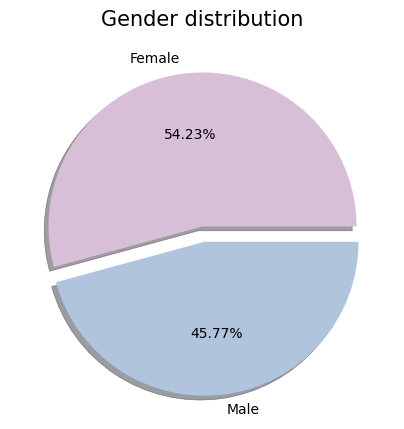

In [62]:
print(data['Gender'].value_counts())   # stampa il conteggio dei valori unici per ciascuna colonna
plt.figure(figsize=(5, 5))   # imposta la dimensione della figura
plt.pie(data['Gender'].value_counts(),   # crea un grafico a torta che conteggia il numero di clienti maschi e femmine
        colors=['thistle', 'lightsteelblue'],   # colori personalizzati per il grafico a torta
        explode=[0, 0.1],   # separa le fette
        labels=['Female', 'Male'],   #etichette con nomi
        shadow=True,   # effetto ombra
        autopct='%.2f%%')   #formatta le percentuali
plt.title('Gender distribution', fontsize=15)   # titolo del grafico
plt.axis('off')   # nasconde gli assi del grafico

plt.show()

3. ## *Visualizzazione della distribuzione dell'indice di gradimento*
   - `like_order`: definisce l'ordine specifico con cui verranno visualizzati i componenti della feature.
   - `data['Like'].value_counts()`: calcola e stampa il conteggio di quanti clienti hanno risposto "Yes" o "No".
   - `sns.catplot`: Crea un grafico a dispersione (`swarm`) per visualizzare la correlazione tra la colonna 'Like' e la colonna 'Age'.

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64 



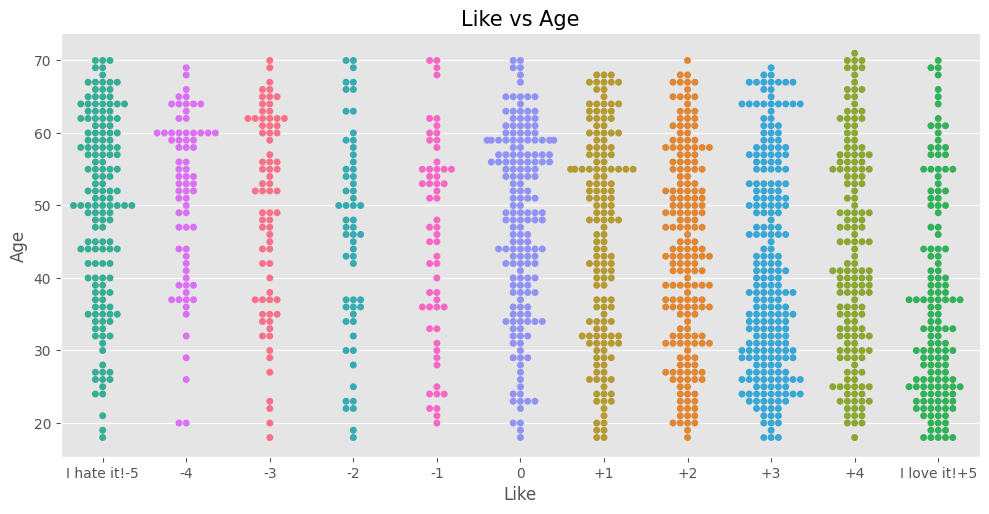

In [63]:
like_order = ['I hate it!-5', -4, -3, -2, -1, 0, '+1', '+2', '+3', '+4', 'I love it!+5']   # ordine delle risposte 'Like'
print(data['Like'].value_counts(), '\n')   # conteggio delle risposte 'yes' o 'no'
sns.catplot(x="Like",   # crea il grafico a dispersione
            y="Age",   # seleziono i nomi degli assi
            data=data,   # dataframe
            orient="v",   # orientamento del grafico
            height=5,   # altezza del grafico
            aspect=2,   # rapporto tra larghezza e altezza
            hue='Like',   # colora i punti in base alla colonna 'Like'
            kind="swarm",   # tipo di grafico
            order=like_order)   # ordine delle risposte 'Like'
plt.title('Like vs Age', fontsize=15)   # titolo del grafico
plt.show()

> Il grafico risultante ci ha permesso di osservare visivamente se ci sono tendenze o relazioni tra l'età dei rispondenti e il loro livello di gradimento.

4. ## *Visualizzazione della distribuzione dell'età*
   - `print(data.describe())`: stampa statistiche descrittive di tutte le colonne **numeriche** nel DataFrame ('Age').
   - Viene creato un grafico a barre (`sns.countplot`) per mostrare quanti clienti ci sono per ogni età rilevata.

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000 



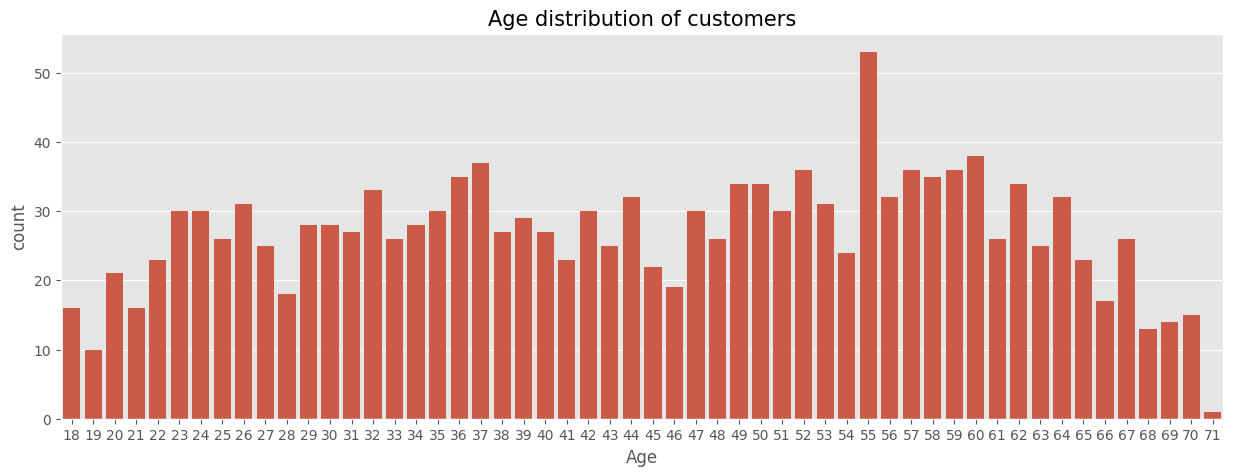

In [64]:
print(data.describe(), "\n")   # Stampa le statistiche descrittive sull'età

plt.figure(figsize=(15, 5))
sns.countplot(x=data['Age'])
plt.title('Age distribution of customers', fontsize=15)
plt.show()

> *Valori come i percentili sono stati utili per una migliore segmentazione delle fasce di età.*

5. ## *Visualizzazione della distribuzione della frequenza di visita*
   - `print(data['VisitFrequency'].value_counts())`: calcola e stampa il conteggio della frequenza di visita.
   - `sns.countplot()` conta il numero di clienti per frequenza di visita.

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64 



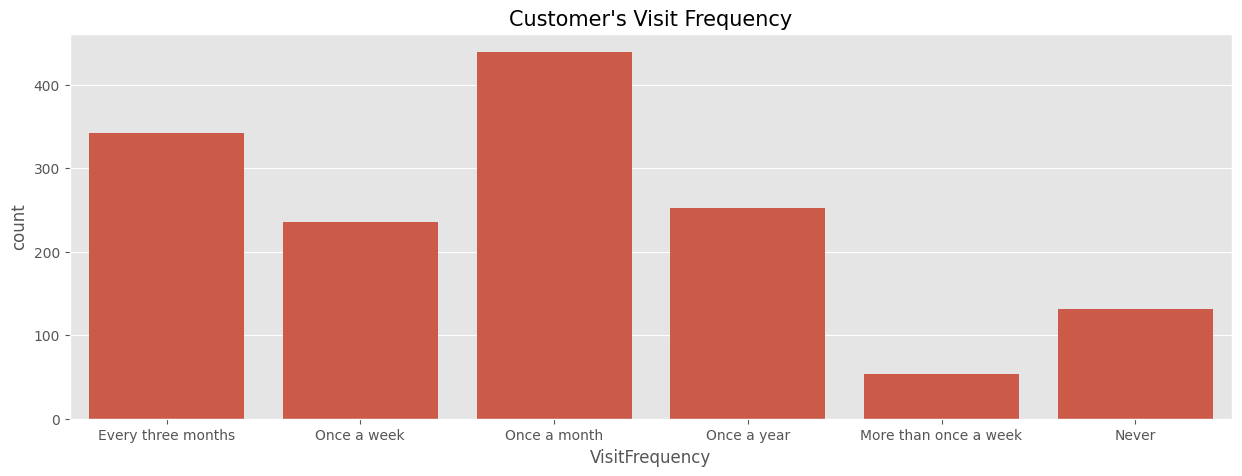

In [65]:
print(data['VisitFrequency'].value_counts(), '\n')   # conteggio delle componenti uniche per la colonna 'VisitFrequency'

plt.figure(figsize=(15, 5))
sns.countplot(x=data['VisitFrequency'])   # crea un grafico a barre che conta il numero di clienti in base alla frequenza di visita
plt.title("Customer's Visit Frequency", fontsize=15)
plt.show()

# **Discretizzazione dati**
Facilitano nella fase successiva l'identificazione di relazioni tra le variabili per la costruzione di modelli predittivi.

***Tabella delle variabili:***

|Variabile|Tipo|Descrizione|
|---|---|---|
|`columns_to_replace`|Lista|Una lista di nomi di colonne nel DataFrame `data` che verranno modificate.|
|`replacement_dict`|Dizionario|Un dizionario che mappa i valori originali nelle colonne selezionate ai nuovi valori numerici.|
|`VisitSostitution`|Dizionario|Un dizionario che mappa i valori originali nella colonna `VisitFrequency` ai nuovi valori numerici.|
|`age_bins`|Lista|Una lista che definisce i limiti degli intervalli di età.|
|`age_labels`|Lista|Una lista di etichette numeriche corrispondenti agli intervalli di età.|

***Descrizione del codice:***

Il seguente blocco di codice riduce la dimensionalità dati e visualizza se l'operazione è avvenuta con successo, sono elencati gli step:

- **Sostituzione dei Valori Categorici:**
    - Itera attraverso le colonne elencate in `columns_to_replace`.
    - Per ogni colonna, mappa i valori originali (come 'Yes', 'No', 'Male', 'Female', ecc.) ai valori numerici corrispondenti nel dizionario `replacement_dict`.
    - Questo converte le variabili categoriche in variabili numeriche, il che è spesso necessario per alcuni tipi di analisi statistiche e di apprendimento automatico.

- **Sostituzione dei Valori nella Colonna 'VisitFrequency':**
    - Utilizza il dizionario `VisitSostitution` per mappare i valori originali della colonna `VisitFrequency` (come 'More than once a week', 'Once a week', ecc.) a valori numerici da 5 a 0, rappresentando la frequenza delle visite.

- **Discretizzazione della Variabile 'Age':**
    - Divide la variabile continua `Age` in intervalli (bins) utilizzando i limiti specificati in `age_bins`.
    - Assegna un'etichetta numerica (`age_labels`) a ciascun intervallo di età.
    - Converte la colonna `Age` in un tipo di dati intero (`int64`).
    
- **Visualizzazione:**
    - `data.head(11)`: Visualizza le prime 11 righe del DataFrame modificato per verificare le trasformazioni effettuate.

In [66]:
columns_to_replace = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender', 'Like']   # colonne da sostituire

replacement_dict = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'I hate it!-5': -5, 'I love it!+5': 5, '+1':1, '+2':2, '+3':3, '+4':4, '-1':-1, '-2':-2, '-3':-3, '-4': -4, '0':0}   # dizionario di sostituzione

for col in columns_to_replace:
    data[col] = data[col].map(pd.Series(replacement_dict))   # sostituisce i valori delle colonne con i valori del dizionario di sostituzione

VisitSostitution = {'More than once a week': 5, 'Once a week': 4, 'Once a month' : 3, 'Every three months': 2, 'Once a year' : 1, 'Never': 0 }   # dizionario di sostituzione per la colonna 'VisitFrequency'
data['VisitFrequency'] = data['VisitFrequency'].map(VisitSostitution)   # sostituisce i valori della colonna 'VisitFrequency' con i valori del dizionario di sostituzione

age_bins = [18, 33, 45, 57, 71]   # definisce gli intervalli di età
age_labels = [1, 2, 3, 4]   

data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)   # crea intervalli di età e assegna un'etichetta a ciascun intervallo
data['Age'] = data['Age'].astype('int64')   # converte la colonna 'Age' in un tipo di dati intero

data.head(11)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,4,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,3,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,4,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,4,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,3,3,1
5,1,1,0,1,0,1,1,1,0,0,0,2,3,2,1
6,1,1,1,1,0,1,0,1,1,1,0,2,3,2,0
7,1,1,0,1,1,1,1,1,0,0,0,5,1,4,0
8,0,0,0,1,1,0,0,0,1,0,1,-5,4,1,1
9,1,1,0,1,1,1,0,1,1,0,0,1,1,2,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


> Notiamo come la riduzione di dimensionalità dati sia avvenuta con successo: tutte le features presentano valori interi su cui ora è possibile operare!

# **Esplorazione e visualizzazione dati post-discretizzazione**
Questo tipo di analisi esplorativa dei dati è utile per comprendere la natura dei dati, identificare eventuali valori anomali o modelli interessanti e prendere decisioni informate sulle fasi successive dell'analisi.

***Tabella delle variabili:***

|Variabile|Tipo|Descrizione|
|---|---|---|
|`focused_data`|Pandas DataFrame|Un sottoinsieme del DataFrame originale (`data`) contenente solo le prime 11 colonne.|
|`numeric_columns`|Pandas DataFrame|Un sottoinsieme di `focused_data` contenente solo le colonne con dati numerici.|
|`column_means`|Pandas Series|Una Series contenente la media di ciascuna colonna numerica in `focused_data`, arrotondata a 2 cifre decimali.|
|`corr`|Pandas DataFrame|Un DataFrame che contiene la matrice di correlazione tra le colonne numeriche in `focused_data`.|

***I seguenti blocchi di codice:***

1. Visualizzano le caratteristiche preferenziali per feature.
    - Si calcola la media di ogni colonna numerica e visualizza la distribuzione dei valori attraverso istogrammi
2. Visualizzano la correlazione tra le features preferenziali.
    - La matrice di correlazione (tipo heatmap) mostra come le variabili sono correlate tra loro, aiutando a identificare relazioni positive, negative o nulle.
3. Visualizzano le correlazioni tra 'Age' e features preferenziali.
    - Ci permette di confrontare come le diverse fasce di età percepiscono gli attributi del fast food.
4. Visualizzano le correlazioni tra 'Like' e features preferenziali.
    - Ci permette di confrontare la media delle valutazioni delle caratteristiche di McDonald's per diversi livelli di gradimento, utilizzando un grafico a barre raggruppate.
5. VIsualizzano le correlazioni tra 'VisitFrequency' e features preferenziali.
    - Ci permette di confrontarea media delle valutazioni delle caratteristiche del fast food per diversi gruppi di frequenza di visita, utilizzando un grafico a barre.

1. ## *Visualizzazione caratteristiche preferenziali singola feature*
    - `focused_data` isola le prime 11 colonne in un nuovo DataFrame 
    - `numeric_columns` mantiene solo le colonne con dati numerici in
    - `column_means` calcola e stampa la media di ogni colonna numerica.
    - `focused_data.hist()` crea e mostra un istogramma per ogni colonna numerica, illustrando la distribuzione dei valori e aiutando a identificare eventuali anomalie o pattern interessanti.

Media per ciascuna colonna: 
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


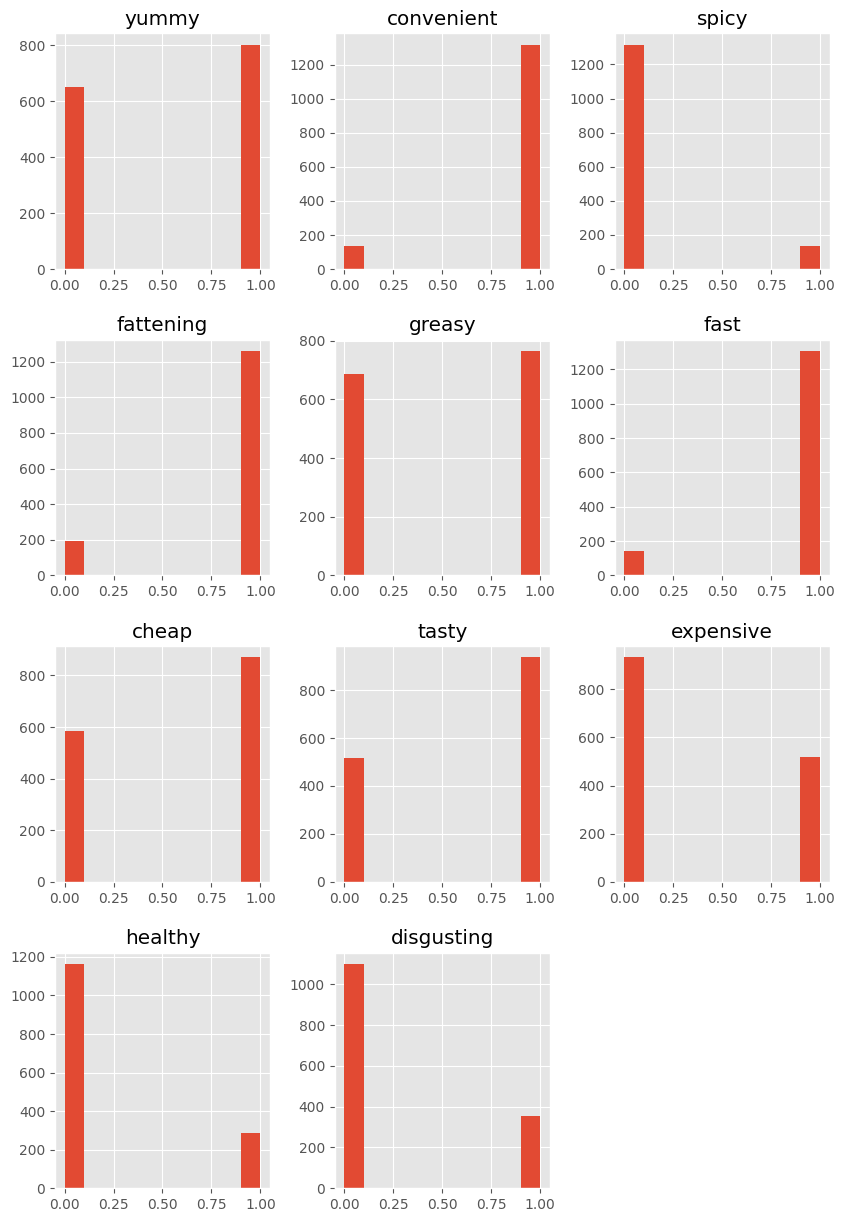

In [68]:
focused_data = data.iloc[:,0:11]   # seleziona le prime 11 features

numeric_columns = focused_data.select_dtypes(include=np.number)   # seleziona le colonne numeriche
column_means = np.round(np.mean(numeric_columns, axis=0), 2)   # calcola la media delle colonne
print("Media per ciascuna colonna:", "\n", column_means)   # stampa la media di tutte le colonne

plt.rcParams['figure.figsize'] = (10,15)   # imposta la dimensione della figura
focused_data.hist()   # crea un istogramma per ciascuna colonna
plt.title('Features values distribution', fontsize=15)   
plt.show()

> Gli istogrammi possono fornire informazioni utili sulla forma della distribuzione dei dati (simmetrica, asimmetrica, ecc.), la presenza di valori anomali e la concentrazione dei valori in determinati intervalli.

2. ## *Visualizzazione correlazione tra features con heatmap*
    - `corr = focused_data.corr()` calcola la matrice di correlazione tra tutte le coppie di colonne numeriche in `focused_data`. 
    - `sns.heatmap(corr, ...)` crea una heatmap (mappa di calore) per visualizzare la matrice di correlazione:

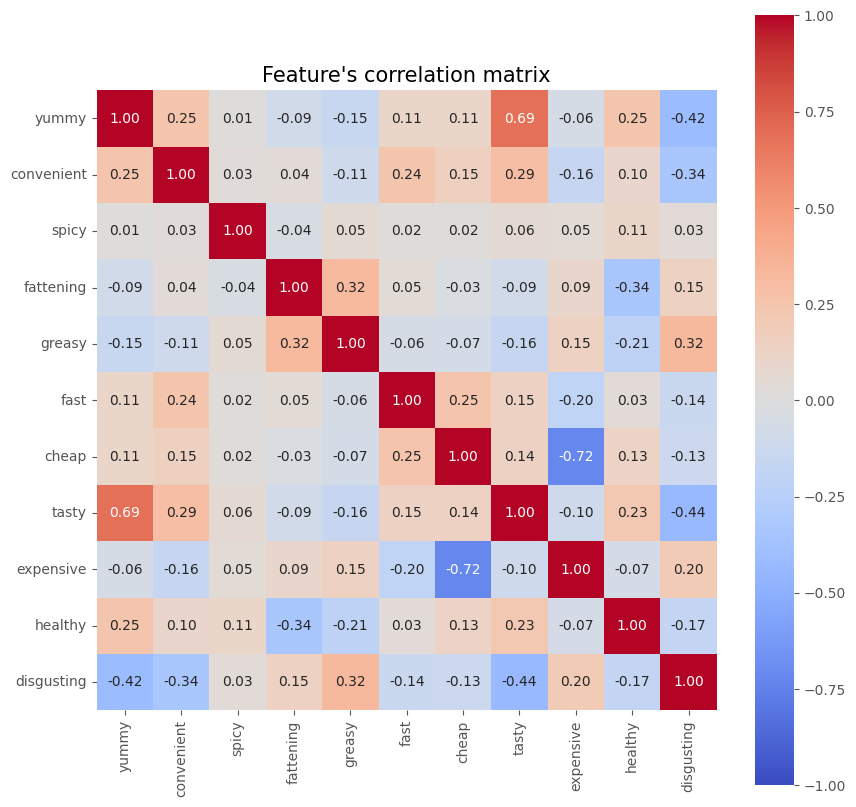

In [69]:
corr = focused_data.corr() # Calcola la matrice di correlazione
plt.subplots(figsize=(10, 10))

sns.heatmap(corr,   # carica la matrice di correlazione
            annot=True,   # annota i valori sulla mappa di calore
            square=True,   # rende la mappa quadrata
            fmt=".2f",   # formatta i valori
            vmin = -1,   # valore minimo
            vmax = 1,   # valore massimo
            center = 0,   # centro
            cmap = 'coolwarm')   # mappa di colori
plt.title("Feature's correlation matrix", fontsize=15)
plt.show()

> L'analisi della matrice di correlazione può aiutare a scoprire quali variabili sono più fortemente correlate tra loro e quindi potenzialmente più rilevanti per l'analisi successiva o per la costruzione di modelli predittivi.
> - Correlazioni positive: valori vicini a 1 indicano una forte relazione positiva (quando una variabile aumenta, anche l'altra tende ad aumentare).
> - Correlazioni negative: valori vicini a -1 indicano una forte relazione negativa (quando una variabile aumenta, l'altra tende a diminuire).
> - Correlazioni nulle: valori vicini a 0 indicano una debole o assente relazione lineare.

3. ## *Visualizzazione correlazione tra 'Age' e features preferenziali*

- `age_group_means ` calcola la media di tutte le colonne numeriche nel DataFrame `data` per ogni gruppo di età definito nella colonna `Age`. Il risultato è un nuovo DataFrame `age_group_means` in cui l'indice rappresenta i gruppi di età e le colonne rappresentano le caratteristiche, con i valori corrispondenti alle medie per ciascun gruppo.

- `features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','VisitFrequency','Gender']` una lista contenente i nomi delle caratteristiche che vengono visualizzate nel grafico.

- `age_group_means = age_group_means[features]`seleziona solo le colonne (caratteristiche) specificate nella lista `features` dal DataFrame `age_group_means`.
    - In questo modo, il DataFrame risultante conterrà solo le medie delle caratteristiche di interesse per ciascun gruppo di età.

- `for age_group in age_group_means.index`inizia un ciclo che itera su ciascun gruppo di età presente nell'indice del DataFrame `age_group_means`.
    - `plt.plot(...)`crea un grafico a linee per ciascun gruppo di età:
        - `age_group_means.columns` rappresenta i valori sull'asse x, che sono i nomi delle caratteristiche.
        - `age_group_means.loc[age_group]` rappresenta i valori sull'asse y, che sono le medie delle caratteristiche per il gruppo di età corrente.
        - `marker='o'` specifica che i punti dati devono essere rappresentati da cerchietti.
        - `label=age_group` assegna un'etichetta alla linea, che corrisponde al gruppo di età.

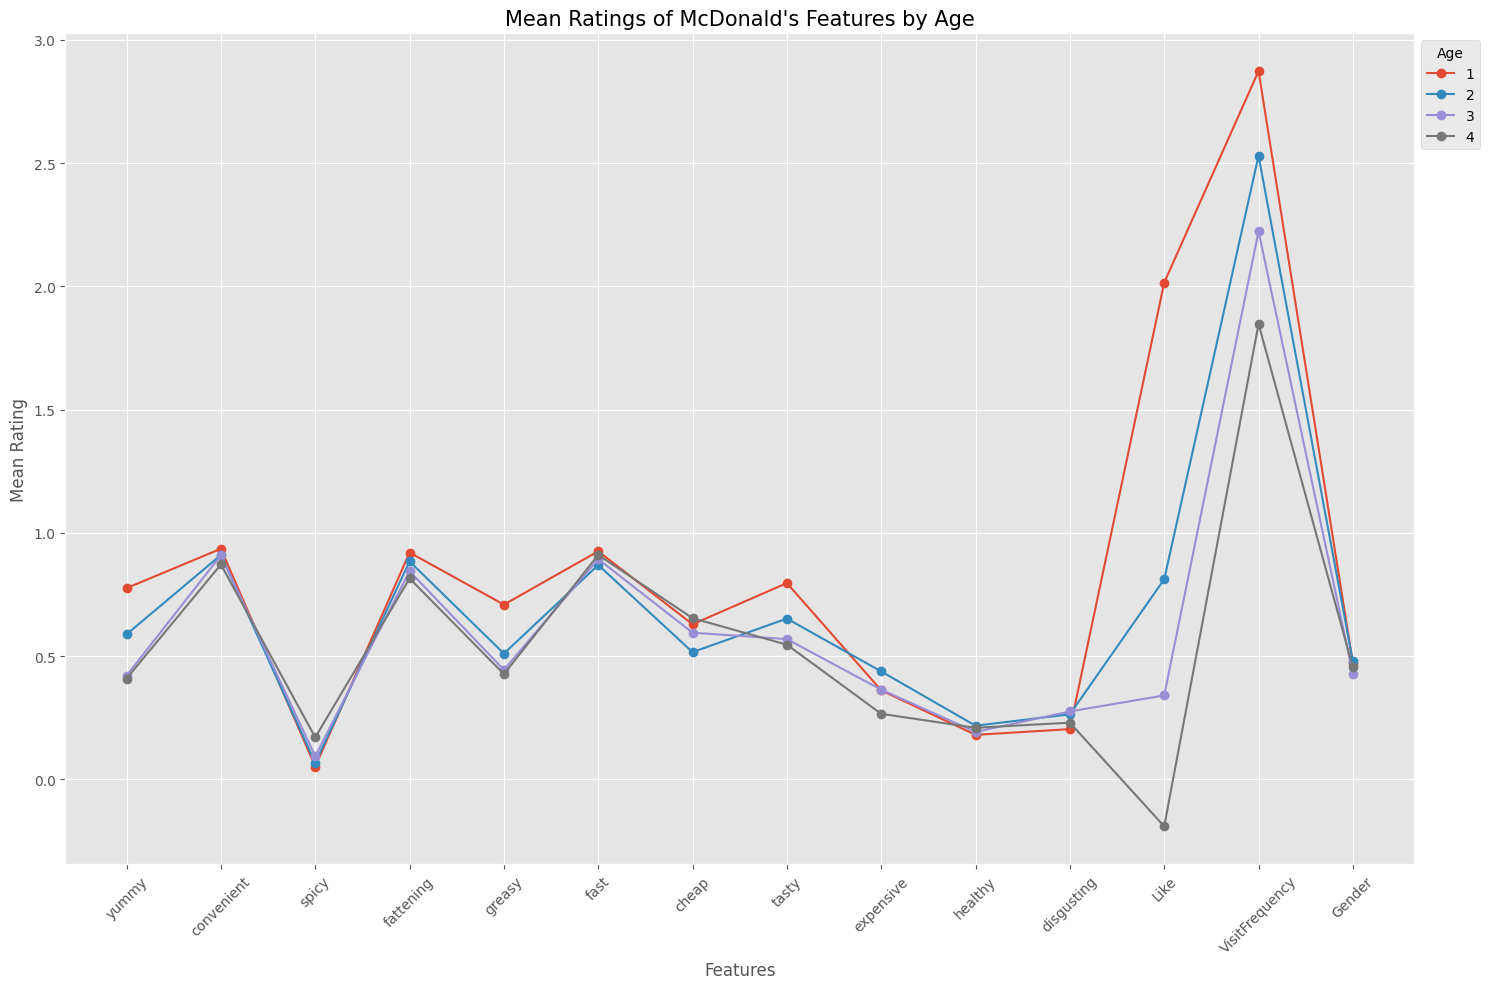

In [70]:
age_group_means = data.groupby('Age').mean()   # calcola la media delle caratteristiche per ciascun gruppo di età

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','VisitFrequency','Gender']   # seleziona le caratteristiche da visualizzare
age_group_means = age_group_means[features]   # seleziona le caratteristiche per ciascun gruppo di età

plt.figure(figsize=(15, 10))
for age_group in age_group_means.index:
    plt.plot(age_group_means.columns, age_group_means.loc[age_group], marker='o', label=age_group)   # crea un grafico a linee per ciascun gruppo di età

plt.title('Mean Ratings of McDonald\'s Features by Age', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Mean Rating')
plt.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. ## *Visualizzazione correlazione tra 'Like' e features preferenziali*

    - `features` definisce una lista contenente i nomi delle caratteristiche (ad esempio, "yummy", "convenient", "spicy", ecc.) che verranno analizzate.

    - `like_group_means = data.groupby('Like').mean()` calcola la media di tutte le colonne numeriche nel DataFrame `data` per ogni gruppo definito dai livelli di gradimento presenti nella colonna `Like`.
        - Il risultato è un nuovo DataFrame `like_group_means` in cui l'indice rappresenta i livelli di gradimento (ad esempio, "-5", "-4", ..., "5") e le colonne rappresentano le caratteristiche, con i valori corrispondenti alle medie per ciascun gruppo.

    - `like_group_means = like_group_means[features]` seleziona solo le colonne (caratteristiche) specificate nella lista `features` dal DataFrame `like_group_means`.
        - In questo modo, il DataFrame risultante conterrà solo le medie delle caratteristiche di interesse per ciascun gruppo di gradimento.

    - `age_groups = like_group_means.index` estrae gli indici (i livelli di gradimento) dal DataFrame `like_group_means` e li assegna alla variabile `age_groups`.

    - `x = np.arange(len(features))` crea un array NumPy `x` contenente numeri interi da 0 alla lunghezza della lista `features` meno 1. Questi numeri saranno utilizzati per posizionare le barre sull'asse x del grafico.

    - `for i, age_group in enumerate(age_groups)` inizia un ciclo che itera su ciascun livello di gradimento in `age_groups`
        - `ax.bar(...)` crea un set di barre per ciascun gruppo di gradimento:
            - `x + i*width`: Calcola la posizione di ogni barra sull'asse x, spostando le barre di ogni gruppo successivo di una quantità pari a `width`.
            - `like_group_means.loc[age_group]`: Ottiene le medie delle caratteristiche per il gruppo di gradimento corrente.
            - `label=str(age_group)`: Assegna un'etichetta alle barre del gruppo corrente (ad esempio, "-5", "-4", ecc.).
            - `color=colors[i]`: Assegna un colore diverso alle barre di ciascun gruppo di gradimento.

    - `age_groups = like_group_means.index.astype(str)`:
        - Converte i valori dell'indice (i livelli di gradimento) in stringhe per evitare problemi di visualizzazione nella legenda.

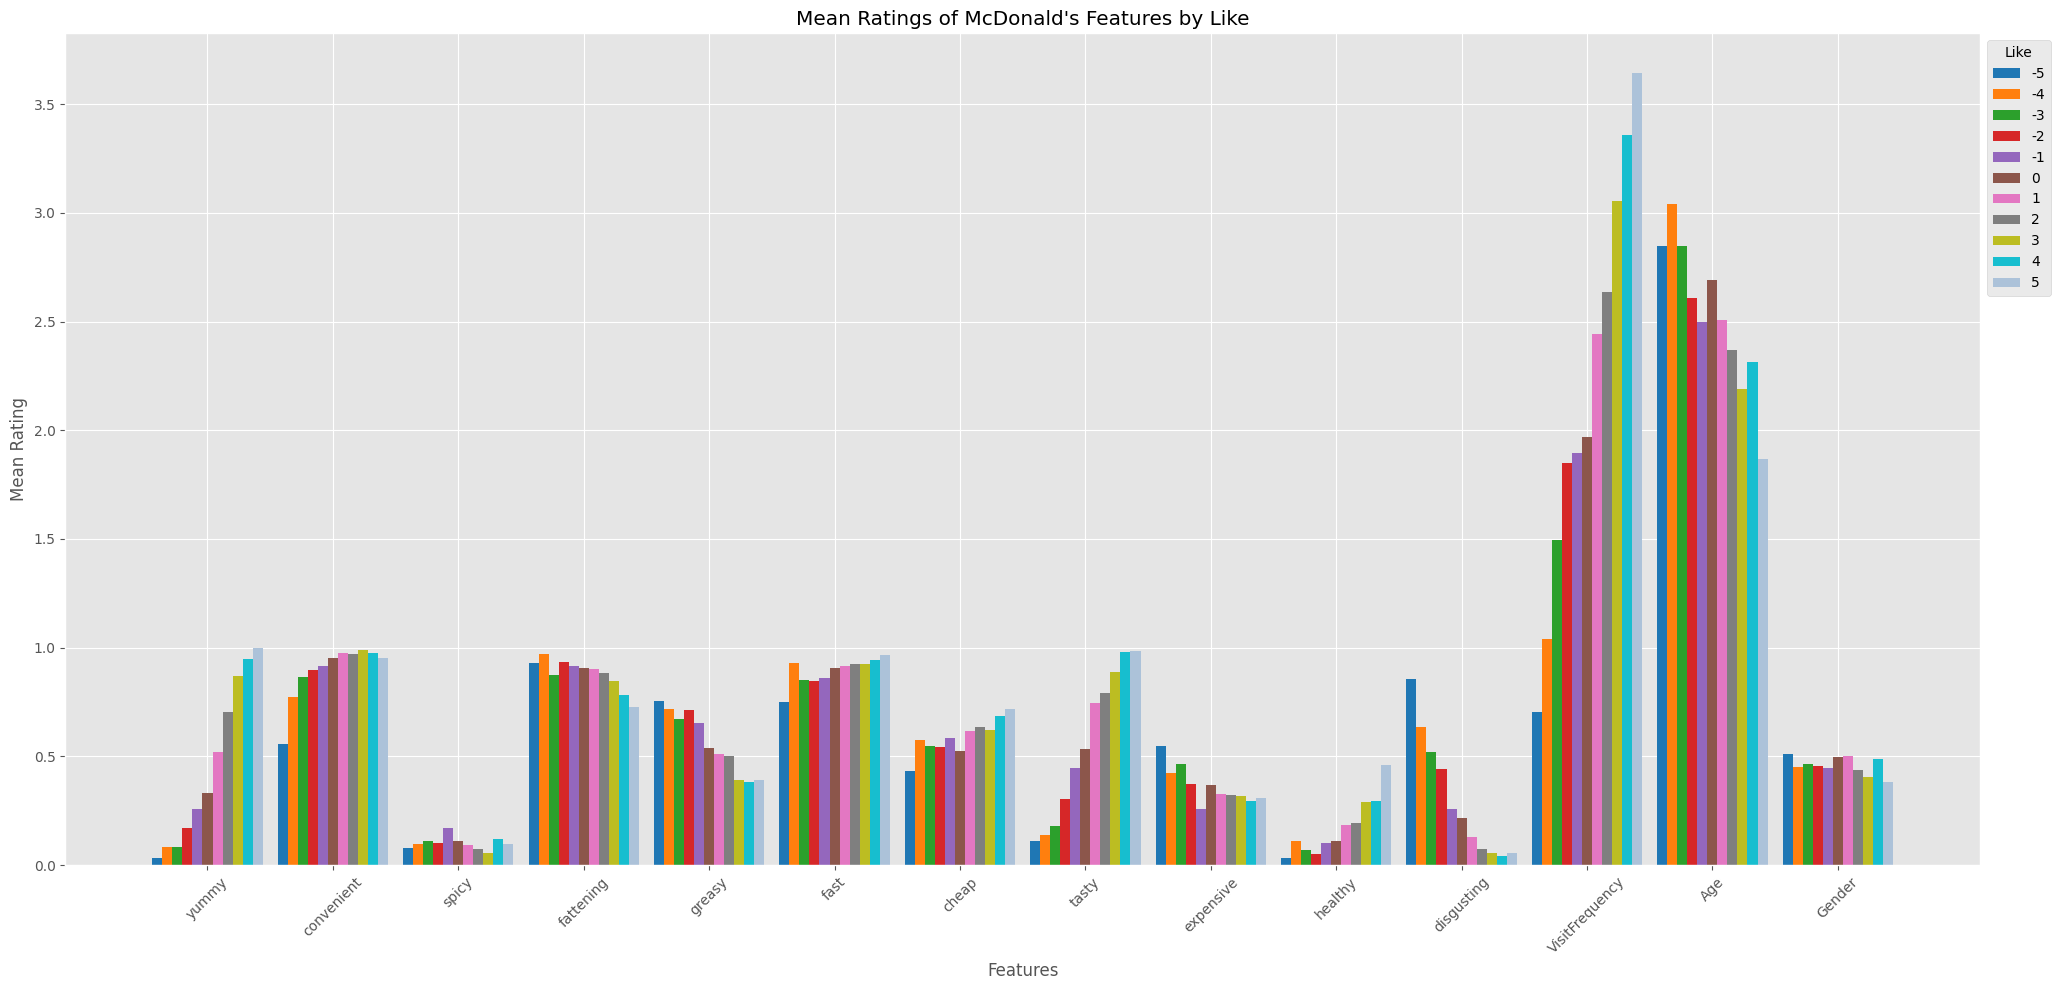

In [71]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency','Age','Gender']   # seleziona le caratteristiche da visualizzare
like_group_means = data.groupby('Like').mean()   # calcola la media delle caratteristiche per ciascun gruppo di età

like_group_means = like_group_means[features]   # seleziona le caratteristiche per ciascun gruppo di età

age_groups = like_group_means.index   # etichetta di gruppo di età
x = np.arange(len(features))  # l'etichetta delle caratteristiche
width = 0.08  # la larghezza delle barre

fig, ax = plt.subplots(figsize=(20, 10))
for i, age_group in enumerate(age_groups):
    ax.bar(x + i*width, like_group_means.loc[age_group], width, label=str(age_group), color=colors[i])   # crea un grafico a barre per ciascun gruppo di età

# Aggiungere alcune etichette
ax.set_xlabel('Features')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Ratings of McDonald\'s Features by Like')
ax.set_xticks(x + width / 2 * (len(age_groups) - 1))
ax.set_xticklabels(features, rotation=45)

age_groups = like_group_means.index.astype(str)   
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.legend(title='Like', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

5. ## *Visualizzazione correlazione tra 'VisitFrequency' e features preferenziali*

    - `features` definisce una lista chiamata contenente i nomi delle caratteristiche che verranno analizzate.
    - `frequency_group_means = data.groupby('VisitFrequency').mean()` calcola la media di tutte le colonne numeriche nel DataFrame `data` per ciascun gruppo definito dai livelli di frequenza di visita presenti nella colonna `VisitFrequency`.
        - Il risultato è un nuovo DataFrame `frequency_group_means` in cui l'indice rappresenta i livelli di frequenza di visita (ad esempio, "Never", "Once a year", ecc.) e le colonne rappresentano le caratteristiche, con i valori corrispondenti alle medie per ciascun gruppo.
    - `frequency_group_means = frequency_group_means[features]` seleziona solo le colonne (caratteristiche) specificate nella lista `features` dal DataFrame `frequency_group_means`. In questo modo, il DataFrame risultante conterrà solo le medie delle caratteristiche di interesse per ciascun gruppo di frequenza di visita.
    - `age_groups = frequency_group_means.index` estrae gli indici (i livelli di frequenza di visita) dal DataFrame `frequency_group_means` e li assegna alla variabile `age_groups`. Questa variabile verrà utilizzata successivamente per etichettare le barre nel grafico.
    - `x = np.arange(len(features))` crea un array NumPy `x` contenente numeri interi da 0 alla lunghezza della lista `features` meno 1.
        - Questi numeri saranno utilizzati per posizionare le barre sull'asse x del grafico.
    - `for i, age_group in enumerate(age_groups)` un ciclo che itera su ciascun livello di frequenza di visita (`age_group`) in `age_groups`. L'indice `i` viene utilizzato per calcolare la posizione delle barre sull'asse x e per selezionare il colore appropriato dalla lista `colors`.
    - `ax.bar(x + i*width, frequency_group_means.loc[age_group], width, label=str(age_group))` crea un set di barre per ciascun gruppo di frequenza di visita:
            - `x + i*width`: Calcola la posizione di ogni barra sull'asse x, spostando le barre di ogni gruppo successivo di una quantità pari a `width`.
            - `frequency_group_means.loc[age_group]`: Ottiene le medie delle caratteristiche per il gruppo di frequenza di visita corrente.
            - `label=str(age_group)`: Assegna un'etichetta alle barre del gruppo corrente (ad esempio, "Never", "Once a year", ecc.).

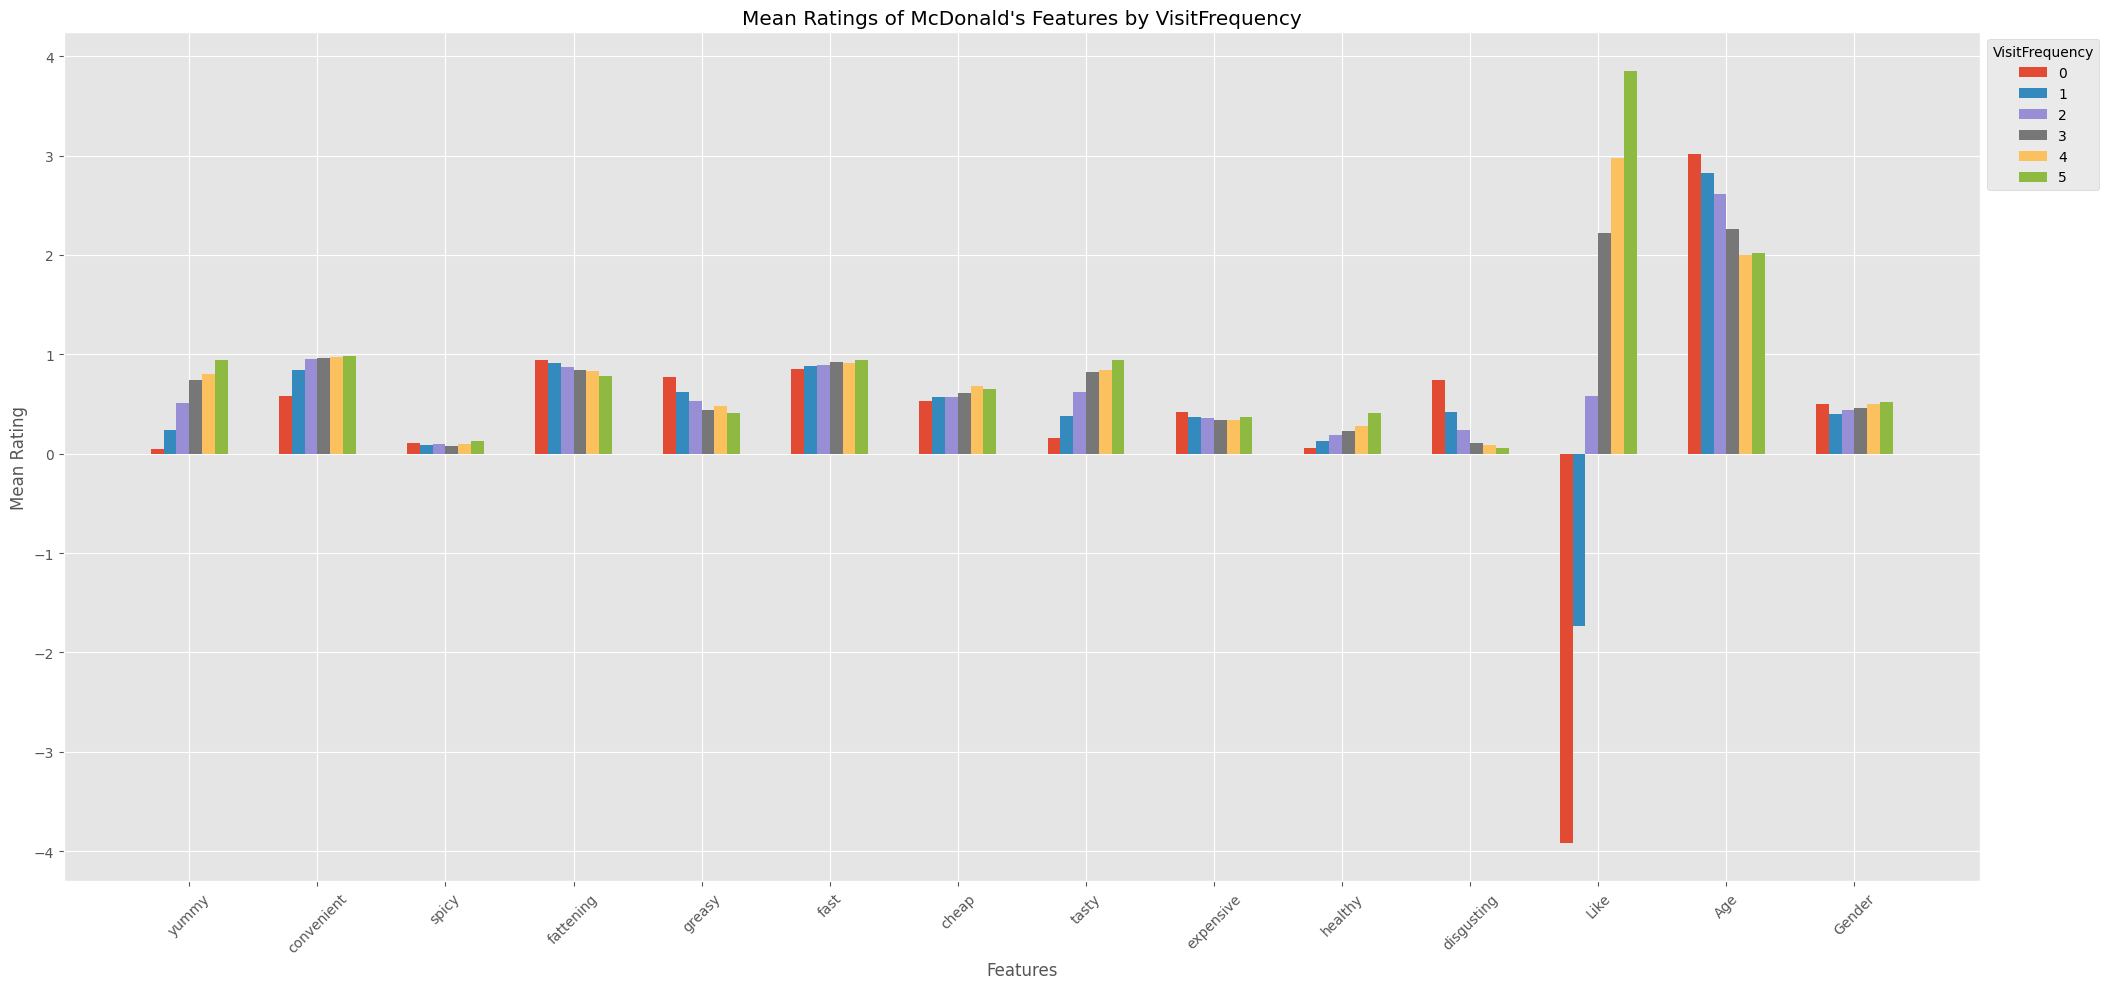

In [72]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','Age','Gender']   # seleziona le caratteristiche da visualizzare
frequency_group_means = data.groupby('VisitFrequency').mean()   # calcola la media delle caratteristiche per ciascun gruppo di età

frequency_group_means = frequency_group_means[features]   # seleziona le caratteristiche per ciascun gruppo di età

age_groups = frequency_group_means.index   # etichetta di gruppo di età
x = np.arange(len(features))  # l'etichetta delle caratteristiche
width = 0.1  # la larghezza delle barre

fig, ax = plt.subplots(figsize=(20, 10))
for i, age_group in enumerate(age_groups):
    ax.bar(x + i*width, frequency_group_means.loc[age_group], width, label=str(age_group))   # crea un grafico a barre per ciascun gruppo di età

# Aggiungere alcune etichette
ax.set_xlabel('Features')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Ratings of McDonald\'s Features by VisitFrequency')
ax.set_xticks(x + width / 2 * (len(age_groups) - 1))
ax.set_xticklabels(features, rotation=45)

age_groups = frequency_group_means.index.astype(str)
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.legend(title='VisitFrequency', bbox_to_anchor=(1, 1), loc='upper left', )
plt.show()

# **PCA**
La PCA riduce la complessità dei dati, combinando le variabili originali in un numero minore di componenti principali che catturano la maggior parte della varianza.

***Tabella delle variabili:***
| Variabile         | Tipo                 | Descrizione                                                                                                                                                                |
| ----------------- | -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `sc`             | StandardScaler object | Un oggetto StandardScaler utilizzato per standardizzare i dati.                                                                                                      |
| `scaled_df`       | NumPy array           | Un array NumPy contenente i dati standardizzati dopo l'applicazione di StandardScaler.                                                                                  |
| `pca`             | PCA object            | Un oggetto PCA (Principal Component Analysis) utilizzato per ridurre la dimensionalità dei dati.                                                                      |
| `pc`             | NumPy array           | Un array NumPy contenente le componenti principali estratte dai dati standardizzati.                                                                                     |
| `pca_df`         | Pandas DataFrame      | Un DataFrame Pandas contenente le componenti principali, con nomi di colonna da 'PC1' a 'PC11'.                                                                         |
| `component_numbers` | Range object         | Una sequenza di numeri da 1 al numero totale di componenti principali. Utilizzata come etichette sull'asse x del grafico a barre della varianza spiegata.             |
| `PC_values`      | NumPy array           | Un array NumPy contenente i numeri da 1 al numero di componenti principali. Utilizzato come coordinate x nello scree plot.                                                |
| `sd`             | Pandas Series         | Una Series contenente la deviazione standard di ciascun componente principale nel DataFrame `pca_df`.                                                                 |

***I seguenti blocchi di codice:***
1. Standardizzano i dati, calcolano una PCA e creano un dataframe con le PC.
    - *Obiettivo*: ridurre la dimensionalità dei dati originali utilizzando la PCA.
2. Visualizzano la dispersione delle PC.
3. Visualizzano il rapporto di varianza tra le PC.
    - Si visualizza la varianza spiegata da ciascuna componente principale in due modi: tramite un grafico a barre e uno scree plot.
4. Visualizza della variazione delle caratteristiche tra PC.

1. ## *Data standardization e PCA*
    - **Standardizzazione dei dati:**
        - `sc = StandardScaler()` inizializza un oggetto `StandardScaler`. Questo oggetto viene utilizzato per standardizzare i dati, ovvero trasformare le caratteristiche in modo che abbiano media zero e deviazione standard unitaria.
        - `scaled_df = sc.fit_transform(focused_data)` applica la standardizzazione ai dati nel DataFrame `focused_data`. 
            - Il metodo `fit_transform` calcola la media e la deviazione standard di ciascuna colonna e poi scala i dati di conseguenza. Il risultato è un array NumPy `scaled_df` contenente i dati standardizzati.

    - **Analisi delle Componenti Principali (PCA):**
        - `pca = PCA(n_components=11)`: Inizializza un oggetto `PCA` specificando che si desidera estrarre 11 componenti principali. La PCA è una tecnica di riduzione della dimensionalità che trova nuove caratteristiche (componenti principali) che catturano la maggior parte della varianza nei dati originali.
        - `pc = pca.fit_transform(scaled_df)`: Applica la PCA ai dati standardizzati `scaled_df`. 
            - Il metodo `fit_transform` calcola le componenti principali e trasforma i dati originali nello spazio delle componenti principali. Il risultato è un array NumPy `pc` contenente le componenti principali.

    - **Creazione del DataFrame delle componenti principali:**
        - `pca_df = pd.DataFrame(data=pc, ...)`: Crea un DataFrame Pandas `pca_df` a partire dall'array `pc`. Le colonne del DataFrame sono denominate 'PC1', 'PC2', ..., 'PC11' per rappresentare le 11 componenti principali.
    
    - **Visualizzazione:**
        - `pca_df.head(10)`: Visualizza le prime 10 righe del DataFrame `pca_df` per mostrare le componenti principali calcolate.

In [73]:
sc = StandardScaler()   # inizializza un oggetto StandardScaler
scaled_df = sc.fit_transform(focused_data)   # standardizza i dati di ingresso utilizzando il trasformatore StandardScaler

pca = PCA(n_components=11)   # inizializza la PCA con 11 componenti
pc = pca.fit_transform(scaled_df)   # adatta e trasforma i dati standardizzati con PCA
pca_df = pd.DataFrame(data=pc, columns=[f'PC{i+1}' for i in range(11)]) # crea il DataFrame dalle componenti principali

pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144
5,1.611088,0.546626,0.434235,-0.741550,-0.206557,-0.465167,-0.671111,0.401152,0.451211,-0.159923,0.082956
6,1.162820,-2.554323,0.081259,2.758296,1.257602,-0.454271,-0.330374,1.611138,-0.291112,-0.161685,-0.251076
7,1.074743,0.819610,1.214468,-0.078911,-0.894950,0.092274,-0.055646,-0.574769,-0.242037,-0.129561,0.020773
8,-4.566454,-1.227881,-1.245089,-0.163407,-2.298765,-0.363442,-0.309906,0.469046,-0.198857,0.029066,0.080847
9,-0.122070,-1.537454,1.852180,-0.238391,0.061907,0.491465,-0.105498,-0.577937,-0.348401,-0.068196,0.056023


2. ## *Visualizzazione della dispersione tra PC*
- `sns.scatterplot(data=pca_df, x="PC2", y="PC1")` crea un grafico a dispersione (scatterplot) utilizzando Seaborn

Text(0.5, 1.0, 'PC dispersion plot')

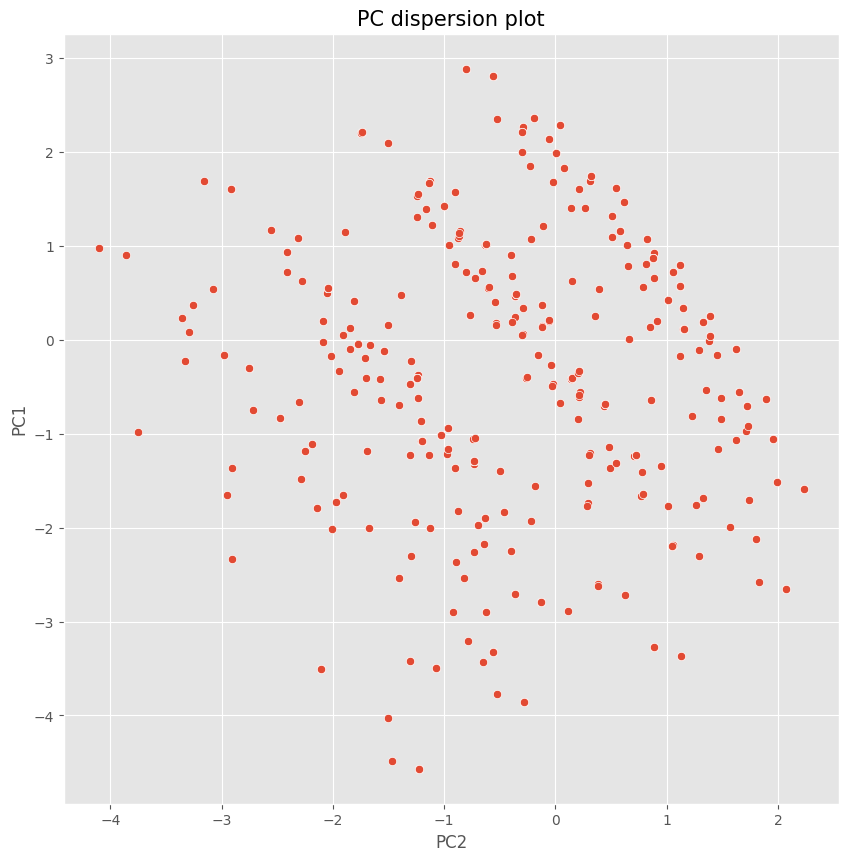

In [74]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="PC2", y="PC1")   # crea un grafico a dispersione delle componenti principali
plt.title('PC dispersion plot', fontsize=15)

> Il grafico a dispersione risultante mostra come i campioni sono distribuiti nello spazio delle prime due componenti principali. La posizione di ogni punto rispetto agli assi indica quanto quel campione è influenzato da ciascuna componente principale.
> - Punti vicini tra loro: Indicazione di campioni simili in termini delle caratteristiche originali.
> - Punti lontani tra loro: Indicazione di campioni diversi.
> - Gruppi di punti: Potrebbero suggerire la presenza di cluster o gruppi naturali nei dati.

3. ## *Visualizzazione rapporto di varianza tra PC*
    - `pca.explained_variance_ratio_` è un attributo dell'oggetto PCA che contiene un array di valori, dove ogni valore rappresenta la proporzione di varianza totale spiegata dalla corrispondente componente principale.

    - `component_numbers = range(1, len(pca.explained_variance_ratio_) + 1)` crea una sequenza di numeri da 1 al numero totale di componenti principali. Questi numeri saranno usati come etichette sull'asse x del grafico.

    - `ax.bar(component_numbers, pca.explained_variance_ratio_, ...)`:
        - `component_numbers` sono le posizioni delle barre sull'asse x.
        - `pca.explained_variance_ratio_` sono le altezze delle barre, che rappresentano la varianza spiegata da ciascuna componente principale.
        - `edgecolor='black'` imposta il colore del bordo delle barre a nero.
    - `PC_values = np.arange(pca.n_components_) + 1`: Questa riga crea un array 'PC_values' che contiene i numeri da 1 al numero di componenti principali presenti.

    - `plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', ...)`:
        - Crea un grafico a linee, che rappresenta lo scree plot.
        - I valori in 'PC_values' sono usati come coordinate x.
        - I valori in 'pca.explained_variance_ratio_' sono usati come coordinate y.
        - 'o-' indica che i punti dati devono essere rappresentati con dei cerchietti ('o') e collegati da una linea continua ('-').
        
    - `plt.tight_layout()` aggiusta automaticamente i parametri del grafico in modo che tutti gli elementi siano visibili e non si sovrappongano.

Rapporto di varianza per ciascuna colonna: 
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


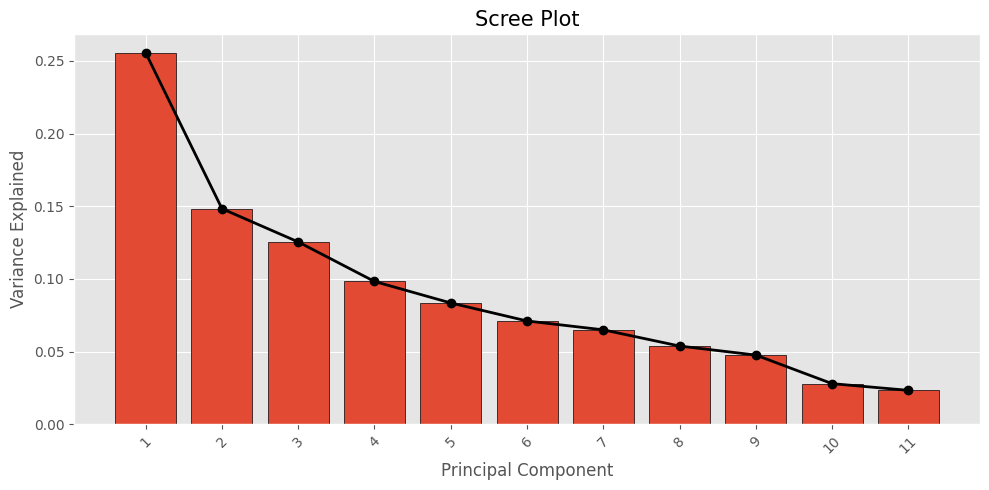

In [75]:
print("Rapporto di varianza per ciascuna colonna:", "\n", pca.explained_variance_ratio_)   # rapporto di varianza di ciascuna colonna

fig, ax = plt.subplots(figsize=(10, 5))   # imposta la dimensione della figura

component_numbers = range(1, len(pca.explained_variance_ratio_) + 1)   # numeri delle componenti
ax.bar(component_numbers, pca.explained_variance_ratio_, edgecolor='black')   # crea un grafico a barre
ax.set_xlabel('Principal Component', fontsize=12)   # etichetta dell'asse x
ax.set_ylabel('Explained Variance Ratio', fontsize=12)   # etichetta dell'asse y
ax.set_title('Scree Plot', fontsize=14)   # titolo del grafico
ax.tick_params(axis='both', which='major', labelsize=10)   # parametri di visualizzazione
PC_values = np.arange(pca.n_components_) + 1   # numeri delle componenti principali

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='black')   # crea un grafico a dispersione
plt.title('Scree Plot', fontsize=15)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.xticks(component_numbers, rotation=45)   # setta e ruota le etichette dell'asse x per una migliore visualizzazione
plt.tight_layout()
plt.show()

> Lo screeplot aiuta visivamente a valutare l'importanza di ciascuna componente e a decidere quante componenti principali utilizzare per rappresentare i dati in modo efficace.

4. ## *Visualizzazione variazione caratterisiche tra PC*

- **Calcolo della deviazione standard**
    - `sd = pca_df.std()` calcola la deviazione standard di ciascun componente principale nel DataFrame `pca_df` e la memorizza nella variabile `sd`.
    - `print("Deviazione standard delle PC:", "\n", sd)` stampa le deviazioni standard calcolate.

- **Creazione del grafico**
    - `fig, ax = plt.subplots(figsize=(10, 10))` crea una figura e un set di assi (`ax`) per il grafico, impostando le dimensioni a 10x10 pollici.

- **Scatter plot delle componenti principali**
    - `ax.scatter(pc[:, 1], pc[:, 0], alpha=0.5)` crea un grafico a dispersione in cui:
        - `pc[:, 1]` rappresenta i valori della seconda componente principale (PC2) per ciascun punto dati.
        - `pc[:, 0]` rappresenta i valori della prima componente principale (PC1) per ciascun punto dati.
        - `alpha=0.5` imposta la trasparenza dei punti a 0.5.

- **Aggiunta delle frecce delle variabili originali**
    - `for i, vector in enumerate(pca.components_.T)` itera attraverso le componenti principali (riga per riga nella matrice delle componenti) e le loro posizioni (`i`).
        - `ax.arrow(0, 0, vector[0] * 3, vector[1] * 3, head_width=0.2, head_length=0.3, color='b')` disegna una freccia blu per ogni componente principale, partendo dall'origine (0, 0) e con una lunghezza proporzionale al contributo della variabile alla componente principale.
        - `ax.text(vector[0] * 3.2, vector[1] * 3.2, str(i), color='r', ha='center', va='center')` aggiunge un'etichetta numerica rossa (l'indice della componente principale) sulla punta di ogni freccia.

Deviazione standard delle PC: 
 PC1     1.677250
PC2     1.277868
PC3     1.175207
PC4     1.040053
PC5     0.958620
PC6     0.884613
PC7     0.845774
PC8     0.769870
PC9     0.724065
PC10    0.554809
PC11    0.506983
dtype: float64


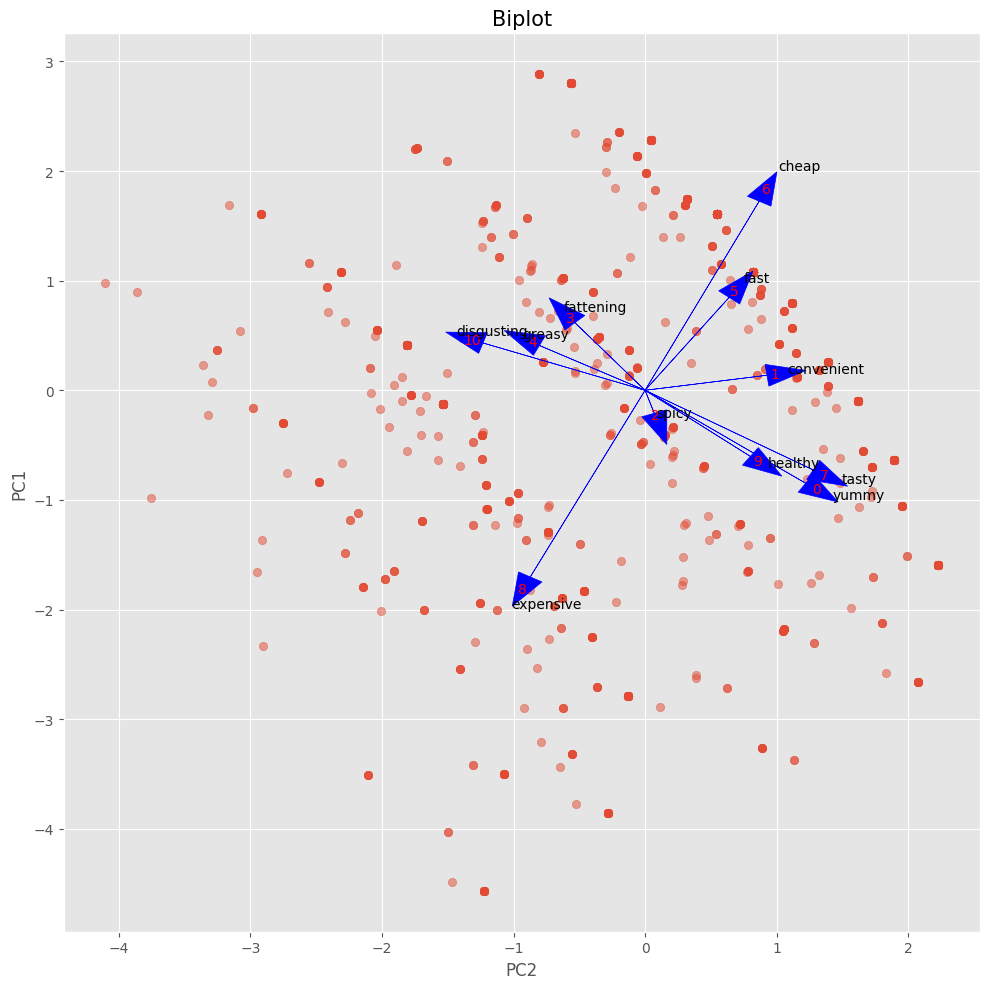

In [76]:
sd=pca_df.std()  # deviazione standard di tutti i componenti
print("Deviazione standard delle PC:", "\n", sd)

fig, ax = plt.subplots(figsize=(10, 10))   # imposta la dimensione della figura

ax.scatter(pc[:, 1], pc[:, 0], alpha=0.5)   # crea un grafico a dispersione delle componenti principali

for i, vector in enumerate(pca.components_.T):   # crea una freccia per ciascuna componente principale
    ax.arrow(0, 0, vector[0] * 3, vector[1] * 3, head_width=0.2, head_length=0.3, color='b')   # crea una freccia
    ax.text(vector[0] * 3.2, vector[1] * 3.2, str(i), color='r', ha='center', va='center')   # etichetta le frecce

ax.set_xlabel('PC2', fontsize=12)   # etichetta dell'asse x
ax.set_ylabel('PC1', fontsize=12)   # etichetta dell'asse y
ax.set_title('Biplot', fontsize=15)   # titolo del grafico

try:
    feature_names = data.columns   #aggiunge i nomi delle caratteristiche al grafico
except AttributeError:
    feature_names = [str(i) for i in range(data.shape[1])]   # aggiunge i nomi delle caratteristiche al grafico

for i, vector in enumerate(pca.components_.T):
    ax.text(vector[0] * 3.5, vector[1] * 3.5, feature_names[i], fontsize=10)   # etichetta le frecce con i nomi delle caratteristiche

plt.tight_layout()
plt.show()

> Il biplot è utile per visualizzare sia le relazioni tra i campioni che le relazioni tra le variabili originali in uno spazio di dimensionalità ridotta.

## **Correlazioni tra PC e features**

***Lista delle variabili:***
|Variabile|Tipo|Descrizione|
|---|---|---|
|`loadings`|NumPy array|Una matrice che contiene i coefficienti di correlazione (loadings) tra le caratteristiche originali e le componenti principali. Ogni riga rappresenta una componente principale e ogni colonna rappresenta una caratteristica originale.|
|`num_pc`|Intero|Il numero di componenti principali da considerare (in questo caso, 11).|
|`pc_list`|Lista|Una lista di stringhe che rappresentano i nomi delle componenti principali (da 'PC1' a 'PC11').|
|`loadings_df`|Pandas DataFrame|Un DataFrame che contiene i loadings, con le componenti principali come righe e le caratteristiche originali come colonne. L'indice del DataFrame è il nome della variabile originale.|

***I seguenti blocchi di codice:***
1. Calcolano la correlazione tra PC e features.
2. Visualizzano queste correlazioni in una heatmap.

1. ## *Calcolo delle correlazioni tra PC e features*

    - `loadings = pca.components_` estrae i loadings dall'oggetto PCA e li assegna alla variabile `loadings`.
        - I loadings indicano quanto ciascuna caratteristica originale contribuisce a ciascuna componente principale.
    - `num_pc = 11` imposta il numero di componenti principali da considerare a 11.
    - `pc_list` crea una lista di stringhe contenente i nomi delle componenti principali, da 'PC1' a 'PC11'.
    - `loadings_df` crea un DataFrame a partire da un dizionario.
        - `zip(pc_list, loadings)` crea un iteratore che accoppia i nomi delle componenti principali (`pc_list`) con le righe corrispondenti della matrice dei loadings (`loadings`).
        - `dict(zip(pc_list, loadings))` converte l'iteratore in un dizionario, dove le chiavi sono i nomi delle componenti principali e i valori sono le righe della matrice dei loadings.
    - `loadings_df['variable'] = focused_data.columns.values` aggiunge una nuova colonna chiamata 'variable' al DataFrame `loadings_df`.
        - I valori di questa colonna sono i nomi delle colonne del DataFrame `focused_data`, che corrispondono alle caratteristiche originali.
    - `loadings_df = loadings_df.set_index('variable')` imposta la colonna 'variable' come indice del DataFrame `loadings_df`.

In [77]:
loadings = pca.components_   # coefficienti di correlazione tra le features e le componenti
num_pc = 11   # numero di componenti principali
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]   # nomi delle componenti principali
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))   # crea un DataFrame dai coefficienti di correlazione
loadings_df['variable'] = focused_data.columns.values   # aggiunge i nomi delle colonne al DataFrame
loadings_df = loadings_df.set_index('variable')   # imposta l'indice del DataFrame
loadings_df.head(11)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.406955,-0.282615,0.259588,0.026237,-0.346857,0.124916,-0.159878,-0.016587,0.195341,-0.691446,-0.091851
convenient,0.308827,0.045682,0.317151,-0.009424,0.437148,-0.188966,0.661814,-0.150033,0.336539,-0.028831,0.021460
spicy,0.023320,-0.069982,-0.020170,0.845496,0.185551,-0.438661,-0.214188,0.027835,-0.025239,-0.058187,-0.041960
fattening,-0.177861,0.205590,0.608077,-0.023396,-0.086934,-0.107520,0.023851,0.720478,-0.105052,0.020311,-0.074626
greasy,-0.267796,0.136300,0.389568,0.330854,-0.343713,0.278329,0.307300,-0.487275,-0.346137,0.015160,-0.031047
fast,0.213039,0.282441,0.211395,0.090363,0.568939,0.572734,-0.392436,-0.055976,-0.099235,-0.017917,-0.054448
cheap,0.289134,0.575032,-0.125157,0.114477,-0.256981,-0.020657,0.008895,0.064667,0.062027,-0.060323,0.691923
tasty,0.426115,-0.242199,0.269648,0.072691,-0.286099,0.053053,-0.197364,-0.059289,0.213587,0.713426,0.006426
expensive,-0.290944,-0.567528,0.183298,0.035510,0.207362,0.171160,-0.015198,0.061727,0.009675,-0.029581,0.693614


2. ## *Visualizzazione correlazioni con heatmpat*

    - `sns.heatmap` crea la heatmap utilizzando Seaborn:
        - `loadings_df`: Il DataFrame che contiene i loadings da visualizzare.
        - `square=True`: Assicura che le celle della heatmap siano quadrate.
        - `annot=True`: Mostra i valori numerici dei loadings all'interno di ciascuna cella della heatmap.
        - `fmt=".2f"`: Formatta i valori numerici con due cifre decimali.
        - `vmin=-1, vmax=1`: Imposta i valori minimo e massimo della scala di colori a -1 e 1, rispettivamente, poiché i coefficienti di correlazione variano tra -1 e 1.
        - `center=0`: Centra la scala di colori sullo zero, in modo che i colori divergano simmetricamente per loadings positivi e negativi.
        - `cmap='coolwarm'`: Utilizza la mappa di colori "coolwarm", dove i loadings negativi sono rappresentati in blu, quelli positivi in rosso e quelli vicini a zero in bianco.

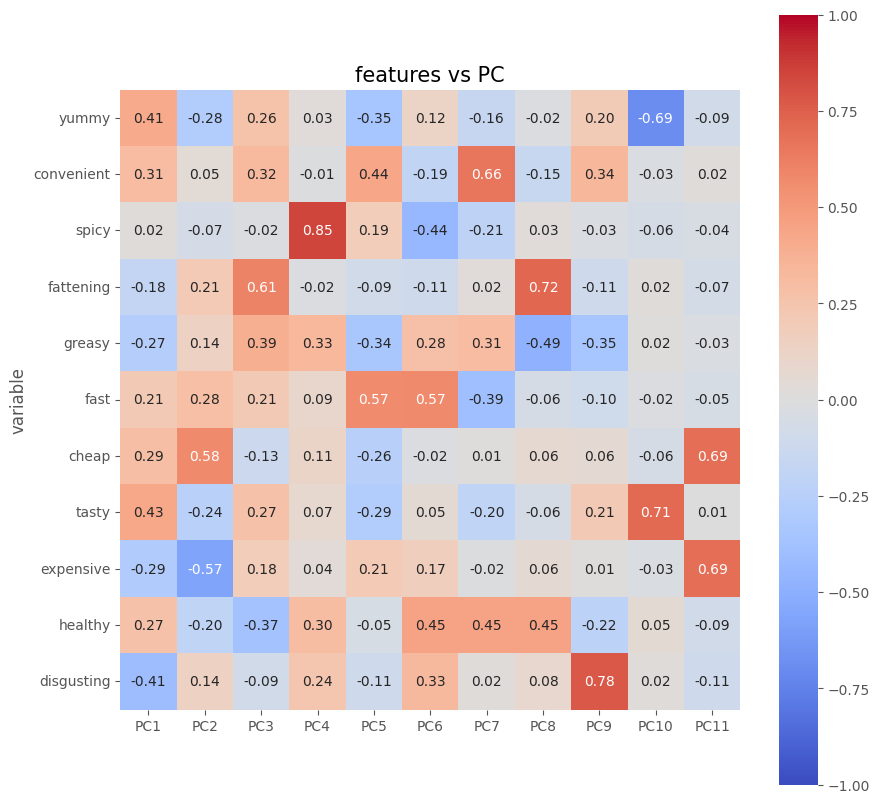

In [78]:
plt.rcParams['figure.figsize'] = (10,10)   # imposta la dimensione della figura
ax = sns.heatmap(loadings_df,   # carica i coefficienti di correlazione
                 square=True,   # rende il grafico quadrato
                 annot=True,   # annota i valori
                 fmt=".2f",   # formatta i valori
                 vmin = -1,   # valore minimo
                 vmax = 1,   # valore massimo
                 center = 0,   # centro
                 cmap = 'coolwarm')   # mappa di colori
plt.title('features vs PC', fontsize=15)
plt.show()

**Interpretazione della Heatmap:**

- Ogni riga della heatmap rappresenta una componente principale.
- Ogni colonna della heatmap rappresenta una caratteristica originale.
- Il colore di ogni cella indica la forza e la direzione della correlazione tra la componente principale e la caratteristica originale:
    - **Rosso:** Correlazione positiva (la caratteristica aumenta quando la componente principale aumenta).
    - **Blu:** Correlazione negativa (la caratteristica diminuisce quando la componente principale aumenta).
    - **Bianco:** Correlazione vicina a zero (poca o nessuna relazione lineare).

<br>

> Questa heatmap è utile per:
> - **Interpretazione delle componenti principali:** Identificare quali caratteristiche originali sono più importanti per ciascuna componente principale.
> - **Selezione delle caratteristiche:** Decidere quali caratteristiche originali utilizzare per ulteriori analisi o per la costruzione di modelli, in base alla loro correlazione con le componenti principali.

# **Clusterizzazione popolazione dati**
La clusterizzazione consente di raggruppare osservazioni simili in base alle loro caratteristiche, rivelando pattern e strutture nascoste nei dati.

***Lista delle variabili:***

| Variabile         | Tipo                 | Descrizione                                                                                                                                                                |
| ----------------- | -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `distortions`       | Lista                 | Memorizza i valori della distorsione (somma dei quadrati delle distanze intra-cluster) per ogni valore di k (numero di cluster).                                        |
| `K`               | Range                | Un intervallo di valori interi da 2 a 11, che rappresenta il numero di cluster da testare.                                                                             |
| `kmeans`           | KMeans object        | Un oggetto che rappresenta l'algoritmo di clustering K-means.                                                                                                          |
| `labels`           | NumPy array           | Un array che contiene l'etichetta del cluster assegnato a ciascun punto dati.                                                                                              |
| `silhouette_scores` | Lista                 | Memorizza i valori del Silhouette Score per ogni valore di k.                                                                                                           |
| `kmeans_labels`    | NumPy array           | Un array NumPy contenente le etichette dei cluster previste dal modello K-means.                                                                                          |
| `pca_df_kmeans`   | Pandas DataFrame      | Un DataFrame che combina le componenti principali (`pca_df`) con le etichette dei cluster (`kmeans_labels`) in una nuova colonna chiamata 'cluster'.                    |
| `centroids`        | Pandas DataFrame      | Un DataFrame contenente le coordinate dei centroidi di ciascun cluster, calcolate come la media dei valori delle componenti principali per i punti dati in ciascun cluster. |
| `linked`           | NumPy array           | Contiene le informazioni sulle fusioni gerarchiche dei cluster.                                                                                                            |
| `cluster_labels`   | NumPy array           | Un array che contiene l'etichetta del cluster assegnato a ciascun punto dati dopo il clustering gerarchico.                                                               |

***I seguenti blocchi di codice:***
1. Calcolano $n$ cluster in modo da individuarne il numero ottimale da applicare.
2. Segmentano i punti dati (clienti) in $n$ cluster con K-Means.
3. Aggiungono la colonna i $n$ cluster al dataframe
4. Visualizzazione tramite scatterplot con centroidi
5. Calcolo clustering gerarchico e visualizzazione tramite dendrogramma.


1. ## *Elbow method + Silhouette Score*

    - **Calcolo della Distorsione (Elbow Method):**
        - Inizializza una lista vuota `distortions` per memorizzare i valori della distorsione.
        - Itera attraverso un intervallo di valori per il numero di cluster `K` (da 2 a 11).
        - Per ogni valore di `k`:
            - Inizializza un oggetto `KMeans` con `k` cluster, `random_state=0` per la riproducibilità e `init='k-means++'` per una migliore inizializzazione dei centroidi.
            - Adatta l'algoritmo K-means ai dati in `pca_df` (le componenti principali calcolate in precedenza).
            - Calcola la distorsione (somma dei quadrati delle distanze intra-cluster) e la aggiunge alla lista `distortions`.
    
    - **Calcolo del Silhouette Score:**
        - Inizializza una lista vuota `silhouette_scores` per memorizzare i punteggi della silhouette.
        - Itera nuovamente attraverso l'intervallo di valori per `K`.
        - Per ogni valore di `k`:
            - Inizializza un oggetto `KMeans` come prima.
            - Adatta l'algoritmo K-means ai dati e ottiene le etichette dei cluster assegnati a ciascun punto dati (`labels`).
            - Calcola il Silhouette Score medio per tutti i punti dati e lo aggiunge alla lista `silhouette_scores`. Il Silhouette Score misura quanto bene ciascun punto dati si adatta al proprio cluster rispetto agli altri cluster.

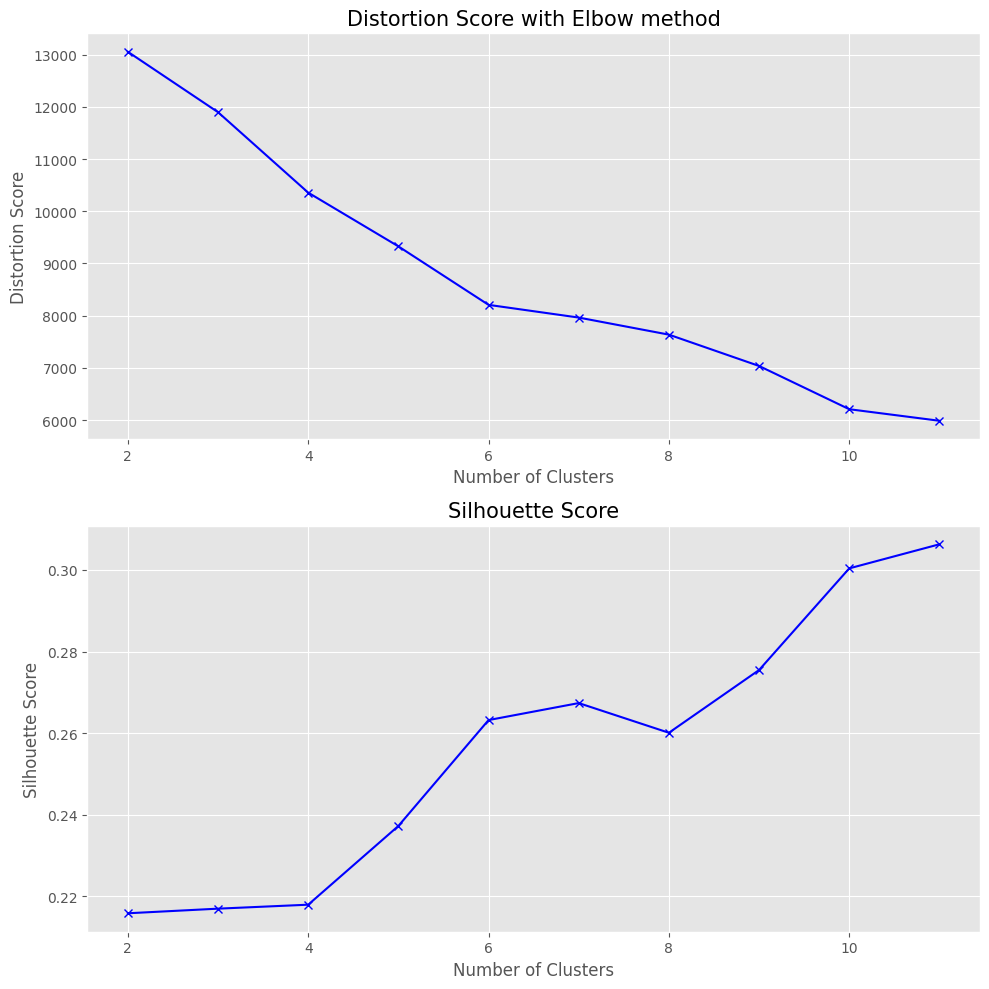

In [79]:
distortions = []   # lista vuota per le distorsioni
K = range(2, 12)   # range di valori per il numero di cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')   # inizializza l'algoritmo KMeans
    kmeans.fit(pca_df)   # adatta i dati
    distortions.append(kmeans.inertia_)   # calcola la distorsione

silhouette_scores = []   # lista vuota per i punteggi della silhouette

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')   # inizializza l'algoritmo KMeans
    labels = kmeans.fit_predict(pca_df)   # adatta i dati e predice i cluster
    silhouette_scores.append(silhouette_score(pca_df, labels))   # calcola il punteggio della silhouette

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score')  
plt.title('Distortion Score with Elbow method', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score', fontsize=15)


plt.tight_layout()
plt.show()

> Entrambi i grafici aiutano a valutare visivamente e scegliere il numero ottimale di cluster da utilizzare per il clustering K-means sui dati delle componenti principali.
> - **Elbow Method:** Cerca un "gomito" nel grafico della distorsione, dove l'aggiunta di ulteriori cluster non riduce significativamente la distorsione.
> - **Silhouette Score:** Cerca il valore più alto del Silhouette Score, che indica una migliore separazione e coesione dei cluster.

2. ## *Clustering K-Means*

    - `kmeans` inizializza l'algoritmo K-means con:
        - `n_clusters=6`: Numero di cluster da creare (6 in questo caso).
        - `random_state=0`: Imposta il seme del generatore di numeri casuali per garantire la riproducibilità dei risultati.
    - `.fit(focused_data)`: Adatta il modello K-means ai dati in `focused_data`, trovando i 6 cluster che meglio rappresentano i dati.


In [80]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(focused_data)   # inizializza l'algoritmo KMeans con 6 cluster

print('Number of iterations:', kmeans.n_iter_, '\n')   # numero di iterazioni che l'algoritmo k-means esegue per ottenere una somma dei quadrati minima all'interno del cluster
print('Centroid location:', kmeans.cluster_centers_, '\n')   # posizione dei centroidi in ciascun cluster
print ('Somma dei quadrati dei cluster:', kmeans.inertia_)   # fornisce la somma dei quadrati all'interno del cluster

Number of iterations: 6 

Centroid location: [[ 3.04000000e-01  9.12000000e-01  9.60000000e-02  5.20000000e-01
   4.00000000e-02  7.92000000e-01  8.00000000e-03  4.64000000e-01
   6.64000000e-01  2.56000000e-01  4.00000000e-02]
 [ 9.43820225e-01  9.62546816e-01  1.31086142e-01  9.81273408e-01
   6.96629213e-01  8.76404494e-01  1.12359551e-01  9.43820225e-01
   9.10112360e-01  1.79775281e-01  1.27340824e-01]
 [-1.11022302e-16  9.66942149e-01  1.40495868e-01  8.92561983e-01
   5.61983471e-01  9.50413223e-01  9.09090909e-01  1.00000000e+00
   5.78512397e-02  1.32231405e-01  1.81818182e-01]
 [ 1.00000000e+00  9.84031936e-01  8.78243513e-02  8.16367265e-01
   3.71257485e-01  9.60079840e-01  9.56087824e-01  9.84031936e-01
   1.99600798e-02  3.27345309e-01  4.99001996e-02]
 [ 3.16205534e-02  8.81422925e-01  5.92885375e-02  9.32806324e-01
   6.24505929e-01  9.60474308e-01  9.44664032e-01  6.66133815e-16
   2.37154150e-02  8.69565217e-02  4.22924901e-01]
 [ 2.15053763e-02  6.18279570e-01  6.989

3. ## *Assegnazione cluster*

    - `kmeans_labels = kmeans.fit_predict(pca_df)` esegue due operazioni contemporaneamente:
        - **Adattamento del modello K-means (`fit`)**: Il modello K-means, precedentemente inizializzato con un numero specifico di cluster, viene addestrato sui dati in `pca_df`.
            - Durante l'addestramento, l'algoritmo cerca di trovare i centroidi ottimali per ciascun cluster, minimizzando la distanza totale tra i punti dati e i loro centroidi assegnati.
        - **Previsione delle etichette dei cluster (`predict`)**: Dopo l'addestramento, il modello assegna un'etichetta di cluster (un numero intero da 0 a k-1, dove k è il numero di cluster) a ciascun punto dati in `pca_df` in base alla sua vicinanza ai centroidi. Queste etichette vengono memorizzate nell'array NumPy `kmeans_labels`.
    - `pca_df_kmeans` :crea un nuovo DataFrame concatenando:
        - Il DataFrame originale `pca_df` contenente le componenti principali.
        - Un nuovo DataFrame creato da `pd.DataFrame({'cluster': kmeans_labels})`, che ha una singola colonna chiamata 'cluster' contenente le etichette dei cluster previste da K-means.
        - `axis=1` specifica che la concatenazione avviene lungo le colonne, aggiungendo la colonna 'cluster' come nuova colonna in `pca_df_kmeans`.

In [81]:
kmeans_labels = kmeans.fit_predict(pca_df)   # Adatta il modello e prevedere le etichette dei cluster
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_labels})], axis=1)   # Concatena le etichette dei cluster con il DataFrame PCA
pca_df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,cluster
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170,3
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681,1
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530,5
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201,2
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144,3


> In questo modo arricchiamo il DataFrame delle componenti principali con le informazioni sui cluster risultanti dal clustering K-means. Questo può essere utile per:
> - **Visualizzazione:** Creare grafici che mostrano come i punti dati sono raggruppati in cluster nello spazio delle componenti principali.
> - **Analisi:** Studiare le caratteristiche dei diversi cluster per identificare gruppi di clienti con preferenze simili.
> - **Modellazione:** Utilizzare le etichette dei cluster come variabile aggiuntiva in altri modelli di analisi o di apprendimento automatico.

4. ## *Visualizzazione tramite scatterplot con centroidi*

- `fpc = 'PC2'` e `spc = 'PC1'` assegnano i nomi delle componenti principali da visualizzare sugli assi x e y.
- `sns.scatterplot` crea un grafico a dispersione (scatter plot) utilizzando Seaborn:
        - `x=fpc, y=spc`: Specifica che PC2 sarà visualizzato sull'asse x e PC1 sull'asse y.
        - `hue="cluster"`: Colora i punti in base all'etichetta del cluster a cui appartengono.
        - `data=pca_df_kmeans`: Utilizza il DataFrame che contiene le componenti principali e le etichette dei cluster.
        - `palette=colors`: Utilizza una palette di colori predefinita per distinguere i cluster.

- `centroids` calcola le coordinate dei centroidi di ciascun cluster:
        - `groupby('cluster')`: Raggruppa i dati per cluster.
        - `mean()`: Calcola la media di PC1 e PC2 per ogni cluster.
        - `reset_index()`: Resetta l'indice del DataFrame risultante.
- `for i, centroid in centroids.iterrows()` itera attraverso i centroidi calcolati.
    - `ax.scatter(centroid[fpc], centroid[spc], marker='s', s=200, color=colors[i])` aggiunge un quadrato al grafico per rappresentare il centroide del cluster corrente.
        - `marker='s'`: Utilizza un quadrato come marker per i centroidi.
        - `s=200`: Imposta la dimensione del marker a 200.
        - `color=colors[i]`: Utilizza lo stesso colore del cluster corrispondente per il centroide.

C:\Users\alexc\AppData\Local\Temp\ipykernel_12320\3993437601.py:5: UserWarning: The palette list has more values (14) than needed (6), which may not be intended.
  ax = sns.scatterplot(x=fpc, y=spc, hue="cluster", data=pca_df_kmeans, palette=colors)   # crea il grafico a dispersione con i colori dei cluster


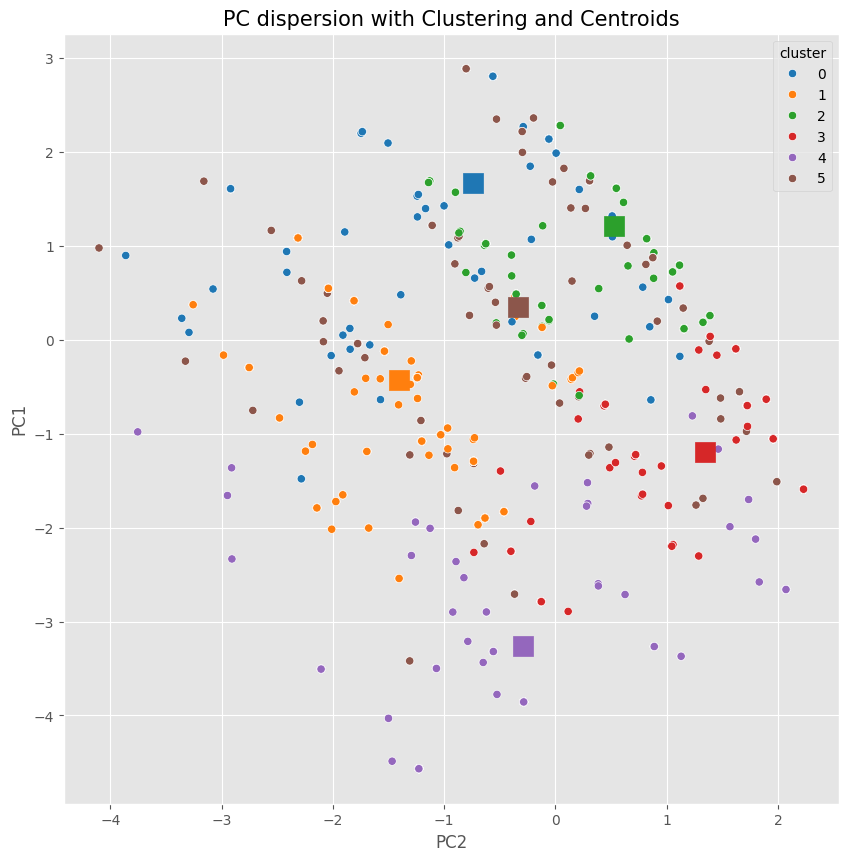

In [82]:
plt.figure(figsize=(10, 10))

fpc = 'PC2'
spc = 'PC1'
ax = sns.scatterplot(x=fpc, y=spc, hue="cluster", data=pca_df_kmeans, palette=colors)   # crea il grafico a dispersione con i colori dei cluster


centroids = pca_df_kmeans.groupby('cluster').mean().reset_index()   # calcolo dei centroidi per ogni cluster


for i, centroid in centroids.iterrows():
    ax.scatter(centroid[fpc], centroid[spc], marker='s', s=200, color=colors[i])   # crea un punto per ciascun centroide

plt.title("PC dispersion with Clustering and Centroids", fontsize=15)
plt.show()

> Si visualizzano i risultati del clustering K-means nel piano delle prime due componenti principali, evidenziando i centroidi di ciascun cluster. Questo grafico permette di:
> - **Visualizzare la separazione dei cluster:** Osservare quanto bene i cluster sono separati l'uno dall'altro nello spazio delle componenti principali.
> - **Identificare la posizione dei centroidi:** Capire dove si trova il "centro" di ciascun cluster, che rappresenta il punto medio delle caratteristiche dei clienti appartenenti a quel cluster.
> - **Valutare la qualità del clustering:** Verificare se i centroidi sono ben distribuiti e se i cluster hanno una forma ragionevole (ad esempio, non troppo allungati o sovrapposti).

5. ## *Clustering gerarchico agglomerativo con dendrogramma*

    - `linked = linkage(pca_df.iloc[:, :11], method='ward')` esegue il clustering gerarchico agglomerativo sui dati delle prime 11 componenti principali (`pca_df.iloc[:, :11]`).
        - `method='ward'`: Specifica il metodo di linkage da utilizzare, in questo caso il metodo di Ward, che minimizza la varianza intra-cluster ad ogni fusione.
        - La funzione `linkage` restituisce una matrice `linked` che contiene le informazioni sulle fusioni gerarchiche.
    - `cluster_labels` assegna un'etichetta di cluster a ciascun punto dati in base al dendrogramma e a un criterio di taglio specificato.
        - `t=6` indica che si vogliono ottenere 6 cluster.
        - `criterion='maxclust'` specifica che il criterio di taglio è il numero massimo di cluster.
    - `pca_df['Cluster'] = cluster_labels` aggiunge una nuova colonna chiamata 'Cluster' al DataFrame `pca_df`, contenente le etichette dei cluster assegnate a ciascun punto dati.
    - `dendrogram(linked)` crea un dendrogramma, un grafico ad albero che mostra la gerarchia dei cluster.
            - Le foglie del dendrogramma rappresentano i singoli punti dati.
            - I rami interni rappresentano le fusioni di cluster.
            - L'altezza di ogni fusione indica la distanza tra i cluster fusi.

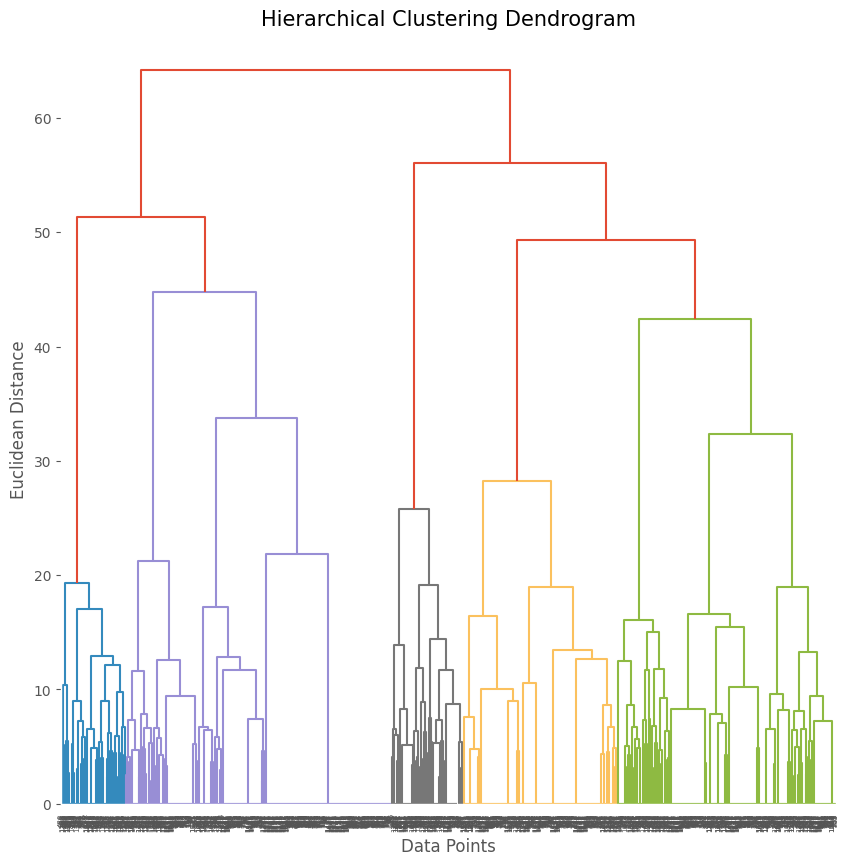

In [83]:
linked = linkage(pca_df.iloc[:, :11], method='ward')   # Esegue il clustering gerarchico
cluster_labels = fcluster(linked, t=6, criterion='maxclust')   # Segna le etichette dei cluster
pca_df['Cluster'] = cluster_labels   # Aggiunge le etichette dei cluster al DataFrame


plt.figure(figsize=(10, 10))
dendrogram(linked)   # Crea un dendrogramma
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.show()

> *Obiettivi raggiunti:*
> - **Eseguire il clustering gerarchico:** Raggruppare i dati delle componenti principali in cluster gerarchici utilizzando il metodo di Ward.
> - **Visualizzare il dendrogramma:** Creare un grafico ad albero (dendrogramma) per visualizzare la gerarchia dei cluster e la distanza tra di essi.
> - **Assegnare etichette ai cluster:** Tagliare il dendrogramma per ottenere un numero specifico di cluster (6 in questo caso) e assegnare un'etichetta a ciascun punto dati in base al cluster a cui appartiene.

6. ## *Visualizzazione tramite scatterplot con punti dati clusterizzati*

    - `pca_df = pca_df.sort_values(by='Cluster')` ordina il DataFrame `pca_df` in base ai valori nella colonna 'Cluster'. 
        - Questo viene fatto per garantire che i punti nel grafico a dispersione siano tracciati in un ordine specifico, facilitando la distinzione visiva dei cluster.

    - `for cluster in pca_df['Cluster'].unique()` itera su ogni etichetta di cluster univoca trovata nella colonna 'Cluster' del DataFrame `pca_df`.
        - `cluster_data = pca_df[pca_df['Cluster'] == cluster]`crea un DataFrame temporaneo `cluster_data` che contiene solo le righe di `pca_df` appartenenti al cluster corrente in elaborazione.
        - `plt.scatter(...)`crea un grafico a dispersione per il cluster corrente:
            - `cluster_data[fpc]` e `cluster_data[spc]`: Queste sono le coordinate x e y dei punti nel grafico a dispersione, prese dalla prima e seconda componente principale dei punti dati appartenenti al cluster corrente.
            - `label=f'Cluster {cluster}'`: Assegna un'etichetta al cluster, che verrà utilizzata nella legenda del grafico.

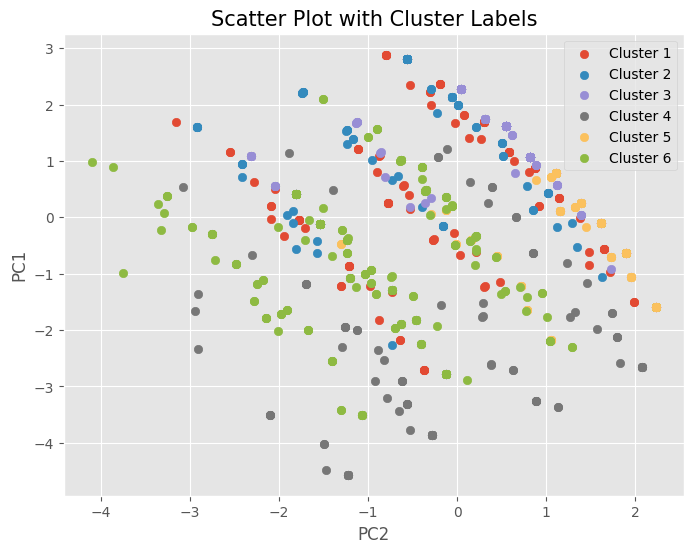

In [84]:
pca_df = pca_df.sort_values(by='Cluster')   # ordina il DataFrame per la colonna 'Cluster'

plt.figure(figsize=(8, 6))

fpc = 'PC2'
spc = 'PC1'

for cluster in pca_df['Cluster'].unique():   
    cluster_data = pca_df[pca_df['Cluster'] == cluster]   # seleziona i dati per ciascun cluster
    plt.scatter(cluster_data[fpc], cluster_data[spc], label=f'Cluster {cluster}')   # crea un grafico a dispersione per ciascun cluster

plt.xlabel(fpc)
plt.ylabel(spc)
plt.title('Scatter Plot with Cluster Labels', fontsize=15)
plt.legend()
plt.show()

> Grafico a dispersione in cui ogni punto rappresenta un punto dati nel dataset e i punti sono colorati in base alle loro assegnazioni al cluster. 
> - Gli assi x e y del grafico rappresentano la prima e la seconda componente principale e il grafico include una legenda per identificare i diversi cluster.